### Content

The National Basketball Association (NBA) is a professional basketball league in North America. The league is composed of 30 teams (29 in the United States and 1 in Canada) and is one of the four major professional sports leagues in the United States and Canada. It is the premier men's professional basketball league in the world.


### Problem Statement

Career longevity is dependent on various factors for any players in all the games and so for NBA Rookies. The factors like games played, count of games played, and other statistics of the player during the game.



### Objective

Using machine learning techniques determine if a player’s career will flourish or not.

In [462]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

from jupyterthemes import jtplot
jtplot.style()

In [463]:
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.express as px

In [464]:
df = pd.read_csv('Train_data.csv')
df.head()

GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  59.0  12.8   3.4  1.3  2.6  51.0      0.2  0.3  50.0  0.7  0.8  78.0   1.1   
1  31.0  10.7   3.4  1.2  3.3  35.3      0.5  2.1  25.8  0.5  0.9  55.2   0.3   
2  48.0   9.3   4.5  1.7  3.4  49.7      0.0  0.1   0.0  1.2  1.9  61.5   0.4   
3  80.0  27.7  11.2  3.5  9.4  37.4      1.3  4.1  32.9  2.8  3.3  85.0   0.8   
4  58.0  18.4   5.8  1.9  5.3  36.7      0.0  0.1  25.0  1.9  3.1  61.7   0.5   

   DREB  REB  AST  STL  BLK  TOV  Target  
0   2.3  3.3  0.5  0.3  0.4  0.5       1  
1   1.1  1.4  0.4  0.3  0.1  0.2       0  
2   0.8  1.2  0.8  0.5  0.4  1.0       0  
3   1.6  2.4  3.9  1.3  0.1  2.2       1  
4   0.7  1.2  1.9  1.1  0.2  1.7       0

## Data Description

 
The values for given attributes are average over all the games played by players

<b>GP</b>: Games Played

<b>MIN</b>:  Minutes Played

<b>PTS</b>: Number of points per game

<b>FGM</b>: Field goals made

<b>FGA</b>: Field goals attempt

<b>FG%</b>: field goals percent

<b>3P Made</b>: 3 point made

<b>3PA</b>: 3 points attempt

<b>3P%</b>: 3 point percent

<b>FTM</b>: Free throw made

<b>FTA</b>: Free throw attempts

<b>FT%</b>: Free throw percent

<b>OREB</b>: Offensive rebounds

<b>DREB</b>: Defensive rebounds

<b>REB</b>: Rebounds

<b>AST</b>: Assists

<b>STL</b>: Steals

<b>BLK</b>: Blocks

<b>TOV</b>: Turnovers

<b>Target</b>: 0 if career years played < 5, 1 if career years played >= 5

##### Checking for null values

In [465]:
df.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

<b>Observation</b>
1. NO NULL VALUES

In [466]:
df.shape

(1101, 20)

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


##### Converting the Target Variable from 0,1 to Played Less than 5 , Played More than 5 for better understanding in EDA

In [468]:
df1=df.copy()
df1['Target']=np.where(df1['Target']==1,'Played More than 5',df1['Target'])
df1['Target']=np.where(df1['Target']=='0','Played Less than 5',df1['Target'])
df1.head()

GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  59.0  12.8   3.4  1.3  2.6  51.0      0.2  0.3  50.0  0.7  0.8  78.0   1.1   
1  31.0  10.7   3.4  1.2  3.3  35.3      0.5  2.1  25.8  0.5  0.9  55.2   0.3   
2  48.0   9.3   4.5  1.7  3.4  49.7      0.0  0.1   0.0  1.2  1.9  61.5   0.4   
3  80.0  27.7  11.2  3.5  9.4  37.4      1.3  4.1  32.9  2.8  3.3  85.0   0.8   
4  58.0  18.4   5.8  1.9  5.3  36.7      0.0  0.1  25.0  1.9  3.1  61.7   0.5   

   DREB  REB  AST  STL  BLK  TOV              Target  
0   2.3  3.3  0.5  0.3  0.4  0.5  Played More than 5  
1   1.1  1.4  0.4  0.3  0.1  0.2  Played Less than 5  
2   0.8  1.2  0.8  0.5  0.4  1.0  Played Less than 5  
3   1.6  2.4  3.9  1.3  0.1  2.2  Played More than 5  
4   0.7  1.2  1.9  1.1  0.2  1.7  Played Less than 5

##### Converting the GP variable to from decimal to floor integer

In [469]:
df1['GP']= df1['GP'].apply(np.floor)
df1.head()

GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  59.0  12.8   3.4  1.3  2.6  51.0      0.2  0.3  50.0  0.7  0.8  78.0   1.1   
1  31.0  10.7   3.4  1.2  3.3  35.3      0.5  2.1  25.8  0.5  0.9  55.2   0.3   
2  48.0   9.3   4.5  1.7  3.4  49.7      0.0  0.1   0.0  1.2  1.9  61.5   0.4   
3  80.0  27.7  11.2  3.5  9.4  37.4      1.3  4.1  32.9  2.8  3.3  85.0   0.8   
4  58.0  18.4   5.8  1.9  5.3  36.7      0.0  0.1  25.0  1.9  3.1  61.7   0.5   

   DREB  REB  AST  STL  BLK  TOV              Target  
0   2.3  3.3  0.5  0.3  0.4  0.5  Played More than 5  
1   1.1  1.4  0.4  0.3  0.1  0.2  Played Less than 5  
2   0.8  1.2  0.8  0.5  0.4  1.0  Played Less than 5  
3   1.6  2.4  3.9  1.3  0.1  2.2  Played More than 5  
4   0.7  1.2  1.9  1.1  0.2  1.7  Played Less than 5

## EDA

#### 1. Univariate Analysis

In [470]:
df1['Target'].value_counts()

Played Less than 5    551
Played More than 5    550
Name: Target, dtype: int64

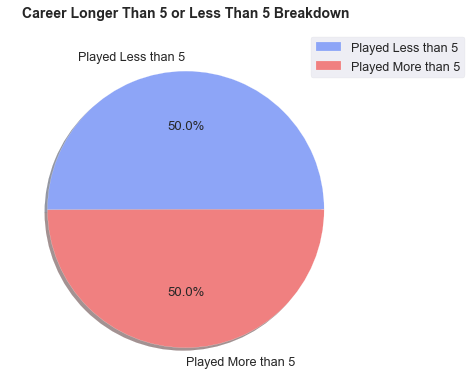

In [471]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
labels='Played Less than 5','Played More than 5'
sizes=list(df1['Target'].value_counts())
colors=['#8da5f7','lightcoral']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Career Longer Than 5 or Less Than 5 Breakdown',y=1.0, pad=40,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.3, 1))
plt.show()

In [472]:
column_names=df1.drop('Target',axis=1).columns
column_names

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [473]:
names={
    'GP': 'Games Played',
    'MIN': 'Minutes Played',
    'PTS': 'Number of points per game',
    'FGM': 'Field goals made',
    'FGA': 'Field goals attempt',
    'FG%': 'field goals percent',
    '3P Made': '3 point made',
    '3PA': '3 points attempt',
    '3P%': '3 point percent',
    'FTM': 'Free throw made',
    'FTA': 'Free throw attempts',
    'FT%': 'Free throw percent',
    'OREB': 'Offensive rebounds',
    'DREB': 'Defensive rebounds',
    'REB': 'Rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers'
}

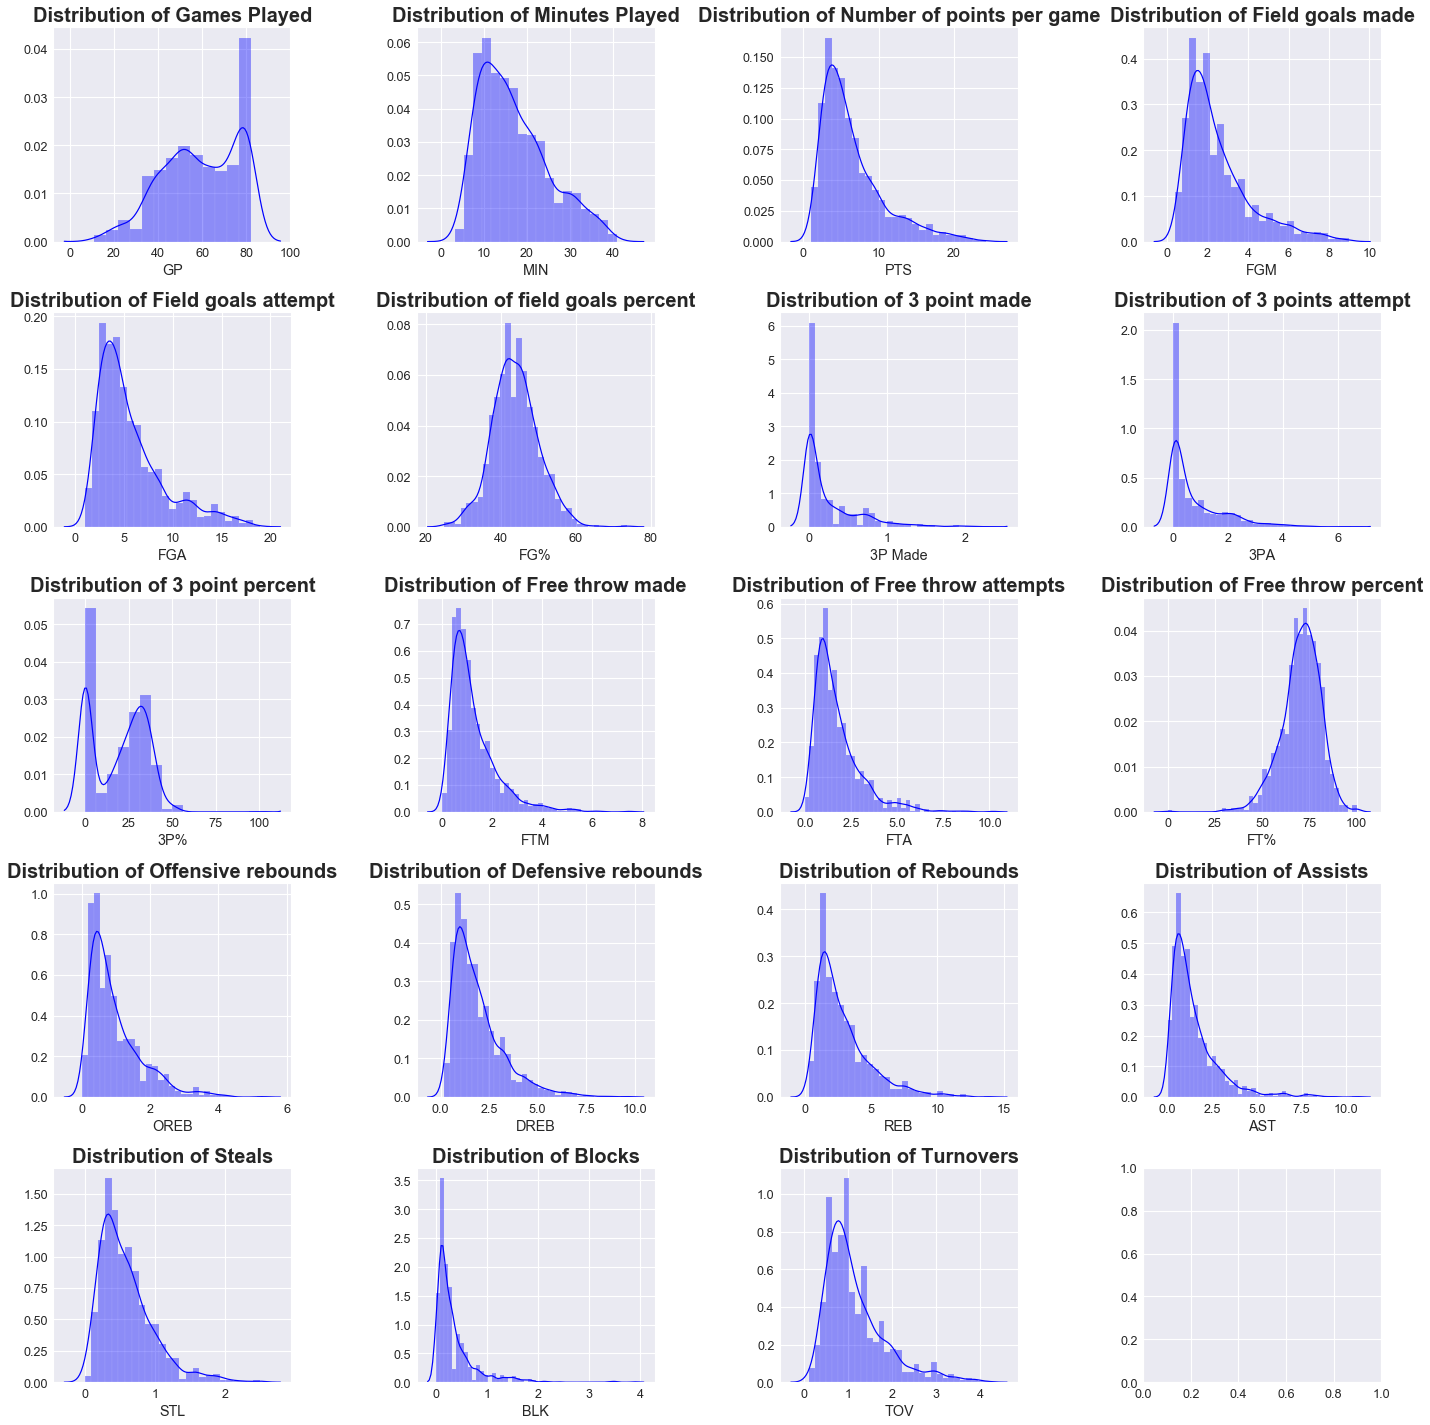

In [474]:
i=0
f, axs = plt.subplots(5,4,figsize=(20,20))
for column_name in column_names:
    # Set up the plot
    ax = plt.subplot(5, 4, i + 1)
    
    # Draw the plot
    sns.distplot(df1[column_name],color = 'blue')
    
    # Title and labels
    ax.set_title('Distribution of %s' % names[column_name],size=20,fontweight='bold')
    i=i+1
    

plt.tight_layout()
plt.show()

<b>Observation</b>
1. Following Variables are Right Skewed:  MIN, PTS, FGM, FGA, 3P Made, 3PA, FTM, FTA, OREB, DREB, REB, AST, STL, BLK, TOV
2. Following Variables are Left Skewed: GP
3. Following Variables are Normal: FG%, FT%
    

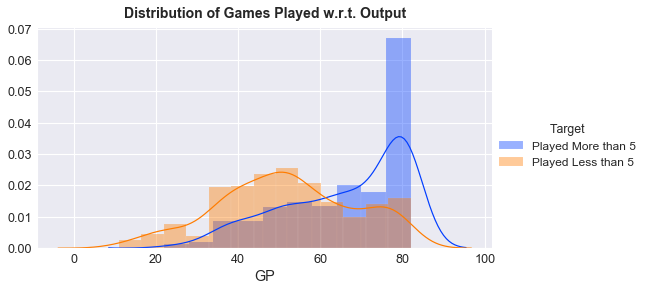

In [475]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,'GP')
plt.title('Distribution of Games Played w.r.t. Output',y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Games Played , Output')

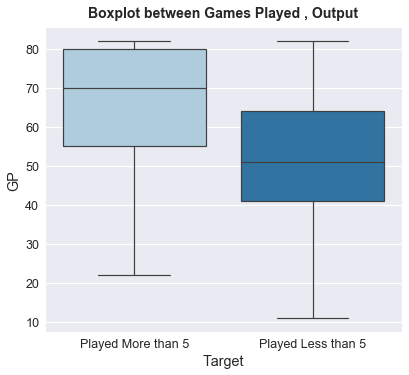

In [476]:
sns.boxplot(x='Target',y='GP',data=df1)
plt.title('Boxplot between Games Played , Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Games Played , Output')

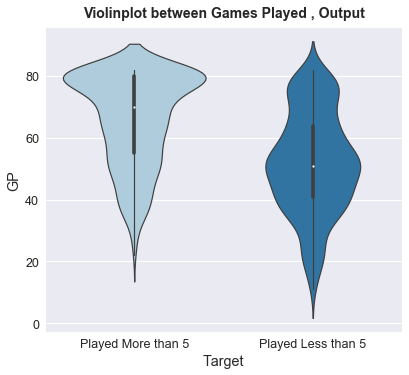

In [477]:
sns.violinplot(x='Target',y='GP',data=df1)
plt.title('Violinplot between Games Played , Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>

1.  Players who played around 76-81 are more likely to play more than 5
2.  Players who played around 45-55 are more likely to play less than 5

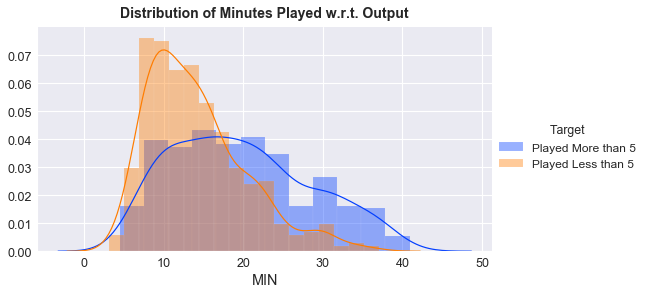

In [478]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[1])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[1]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Minutes Played , Output')

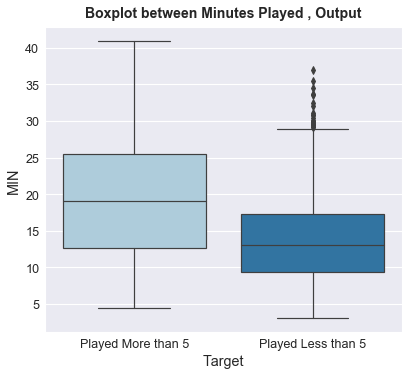

In [479]:
sns.boxplot(x='Target',y=column_names[1],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[1]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Minutes Played , Output')

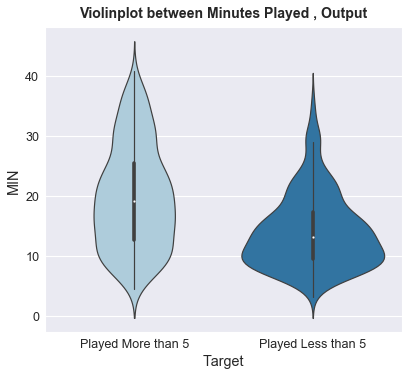

In [480]:
sns.violinplot(x='Target',y=column_names[1],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[1]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>

1. Players who played around 12-25 Minutes are more likely to play more than 5
2. Players who played around 9-13 Minutes are more likely to play less than 5

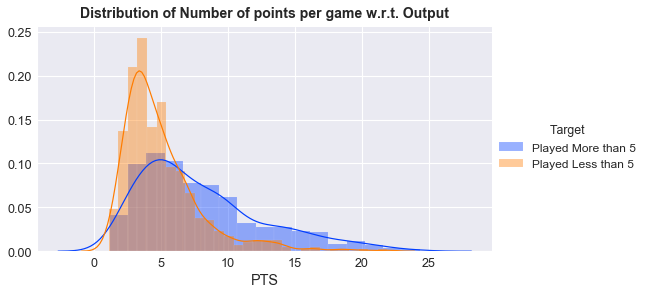

In [481]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[2])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[2]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Number of points per game , Output')

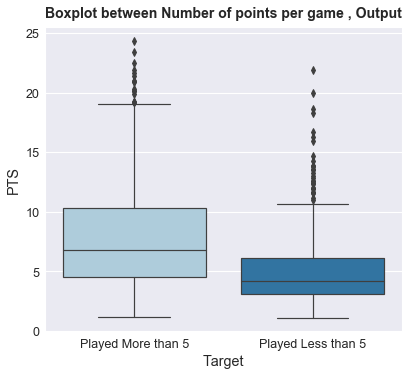

In [482]:
sns.boxplot(x='Target',y=column_names[2],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[2]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Number of points per game , Output')

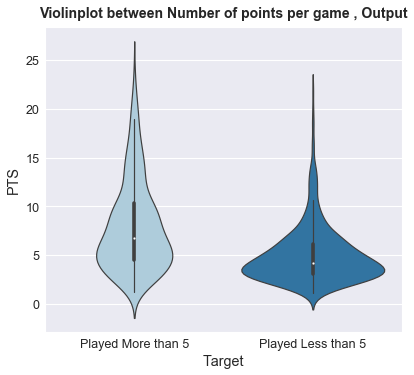

In [483]:
sns.violinplot(x='Target',y=column_names[2],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[2]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>

1. Players who scored around 4-6 Points per game are more likely to play more than 5
2. Players who scored around 2-4 Points per game are more likely to play less than 5

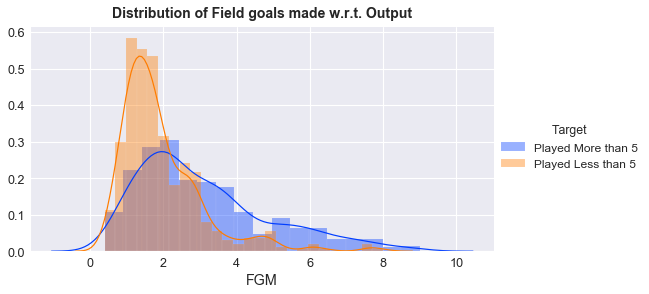

In [484]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[3])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[3]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Field goals made , Output')

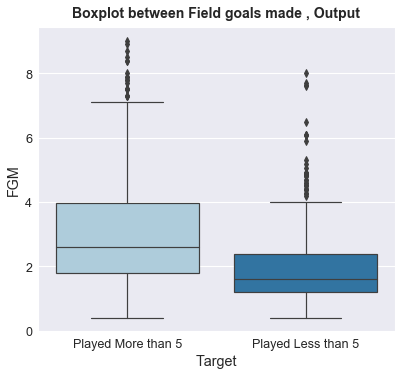

In [485]:
sns.boxplot(x='Target',y=column_names[3],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[3]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Field goals made , Output')

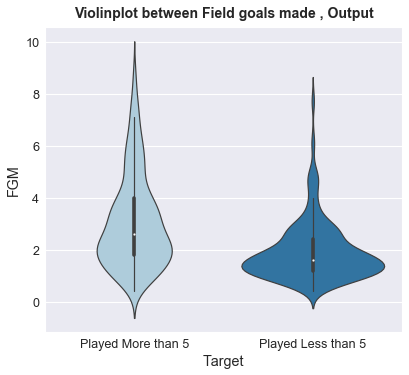

In [486]:
sns.violinplot(x='Target',y=column_names[3],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[3]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>

1. Players who scored around 1.7-2.2 Field Goals are more likely to play more than 5
2. Players who scored around 1.2-1.6 Field Goals are more likely to play less than 5


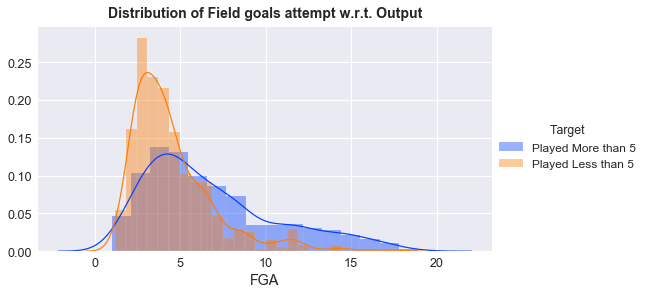

In [487]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[4])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[4]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Field goals attempt , Output')

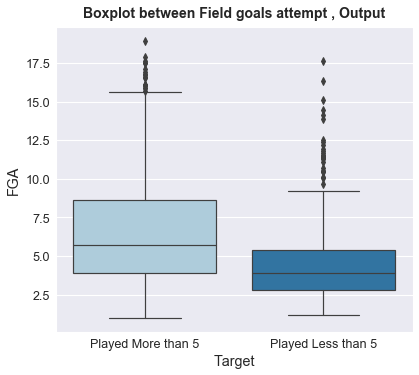

In [488]:
sns.boxplot(x='Target',y=column_names[4],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[4]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Field goals attempt , Output')

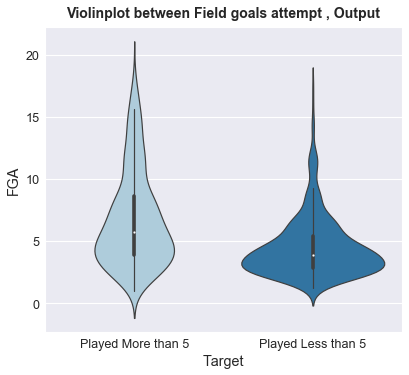

In [489]:
sns.violinplot(x='Target',y=column_names[4],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[4]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>

1. Players who attempted around 3.9-5 Field Goals are more likely to play more than 5
2. Players who attempted around 2.5-3.8 Field Goals are more likely to play less than 5

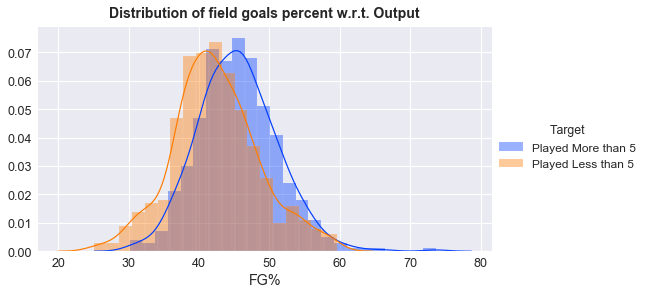

In [490]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[5])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[5]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between field goals percent , Output')

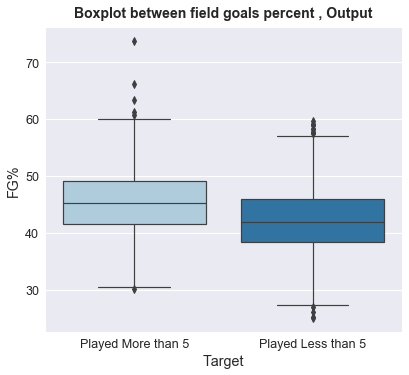

In [491]:
sns.boxplot(x='Target',y=column_names[5],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[5]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between field goals percent , Output')

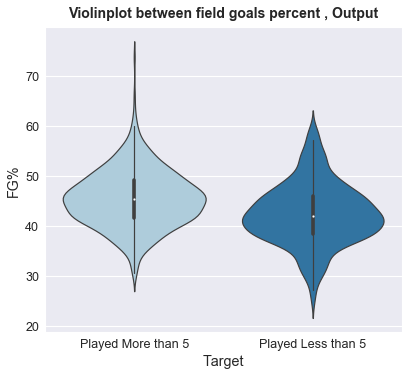

In [492]:
sns.violinplot(x='Target',y=column_names[5],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[5]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

In [493]:
px.violin(df1,y='FG%',x='Target',box=True)

<b>Observation</b>
1. Players who have field goals percent around 43-47 are more likely to play more than 5
2. Players who have field goals percent around 38-43 are more likely to play less than 5

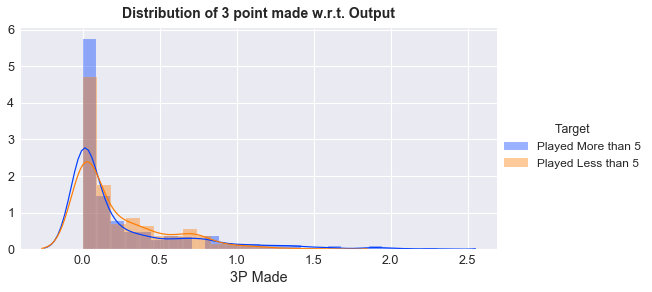

In [494]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[6])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[6]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between 3 point made , Output')

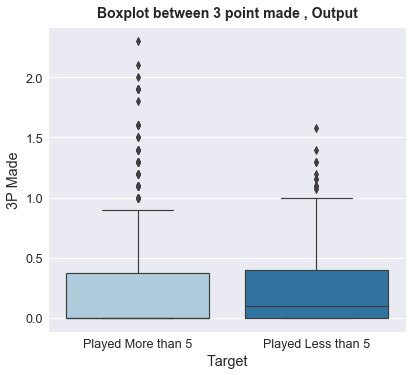

In [495]:
sns.boxplot(x='Target',y=column_names[6],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[6]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between 3 point made , Output')

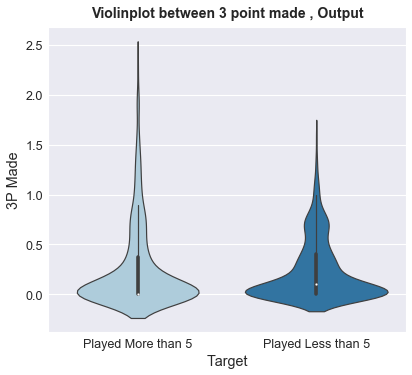

In [496]:
sns.violinplot(x='Target',y=column_names[6],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[6]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>
1. 3 point made by the player has no effect on the output

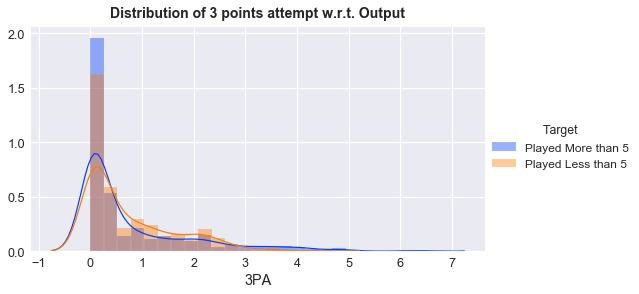

In [497]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[7])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[7]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between 3 points attempt , Output')

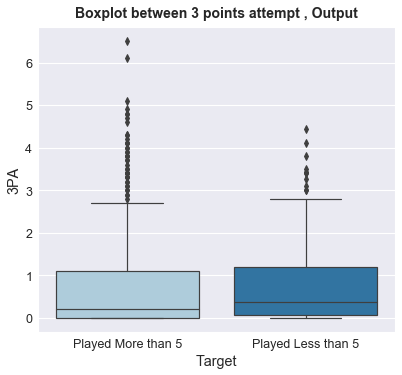

In [498]:
sns.boxplot(x='Target',y=column_names[7],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[7]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between 3 points attempt , Output')

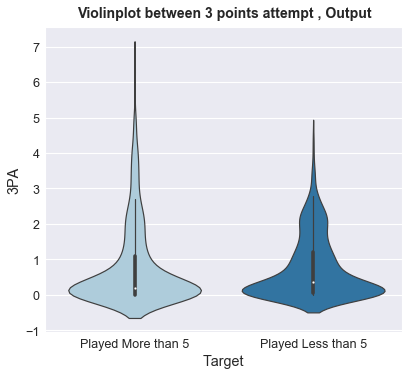

In [499]:
sns.violinplot(x='Target',y=column_names[7],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[7]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>
1. 3 point attempts by the player has no effect on the output

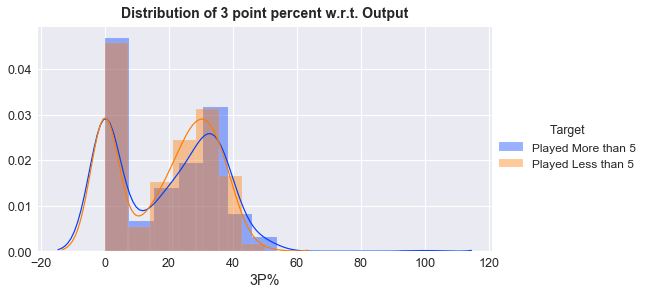

In [500]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[8])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[8]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between 3 point percent , Output')

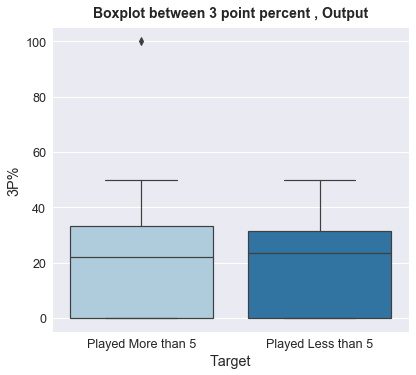

In [501]:
sns.boxplot(x='Target',y=column_names[8],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[8]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between 3 point percent , Output')

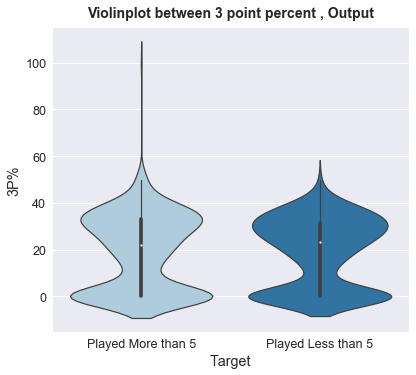

In [502]:
sns.violinplot(x='Target',y=column_names[8],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[8]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>
1. 3 point percent by the player has no effect on the output

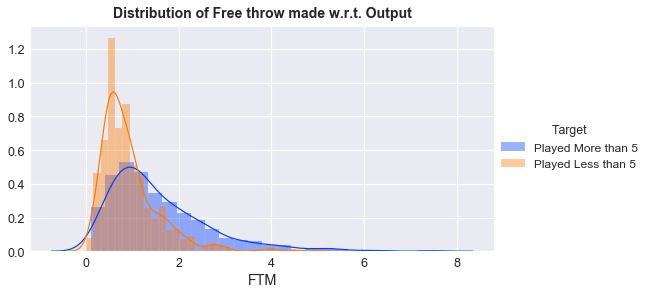

In [503]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[9])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[9]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Free throw made , Output')

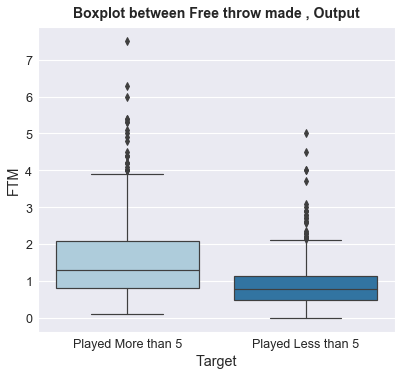

In [504]:
sns.boxplot(x='Target',y=column_names[9],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[9]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Free throw made , Output')

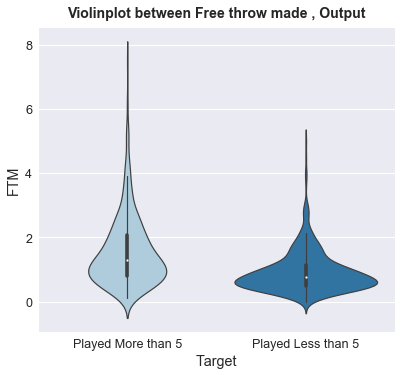

In [505]:
sns.violinplot(x='Target',y=column_names[9],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[9]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>

1. Players who made around 0.78-1.2 free throws are more likely to play more than 5
2. Players who made around 0.45-0.75 free throws are more likely to play less than 5


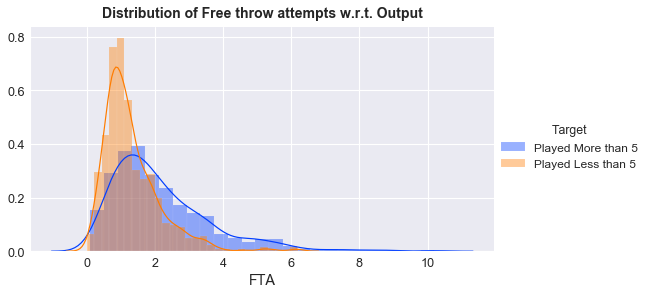

In [506]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[10])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[10]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Free throw attempts , Output')

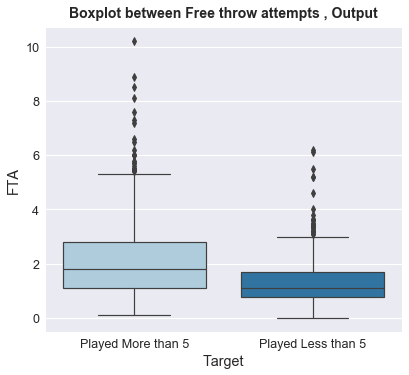

In [507]:
sns.boxplot(x='Target',y=column_names[10],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[10]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Free throw attempts , Output')

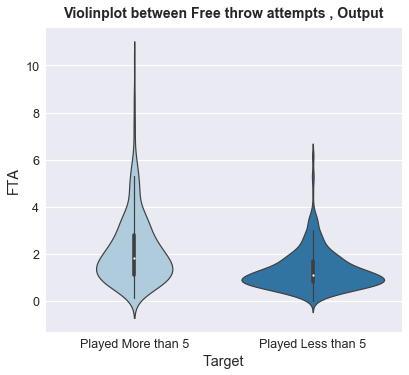

In [508]:
sns.violinplot(x='Target',y=column_names[10],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[10]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>

1. Players who attemped around 1.1-1.8 Free throws are more likely to play more than 5
2. Players who attemped around 0.69-1 Free throws are more likely to play less than 5

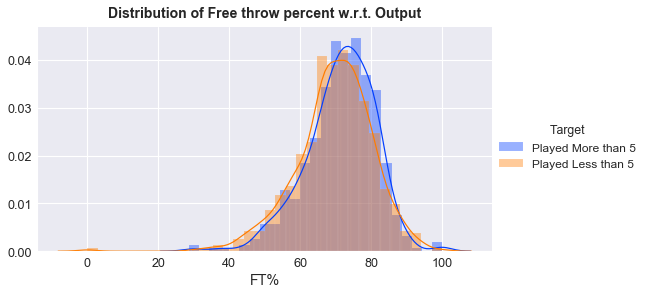

In [509]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[11])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[11]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Free throw percent , Output')

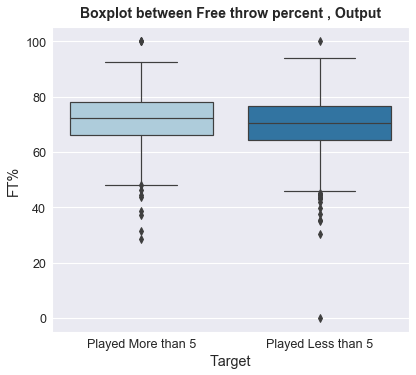

In [510]:
sns.boxplot(x='Target',y=column_names[11],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[11]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Free throw percent , Output')

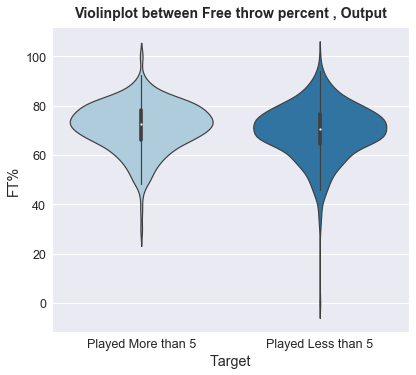

In [511]:
sns.violinplot(x='Target',y=column_names[11],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[11]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Obesrvation</b>
1. Free throw percent has no effect on the output

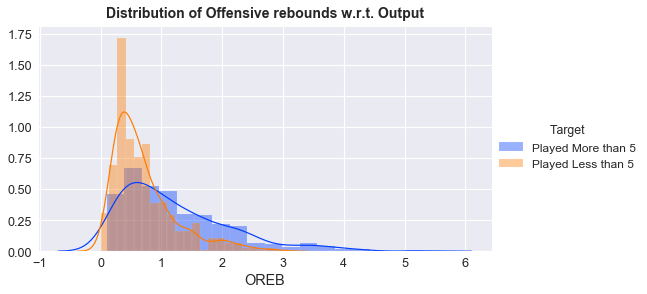

In [512]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[12])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[12]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Offensive rebounds , Output')

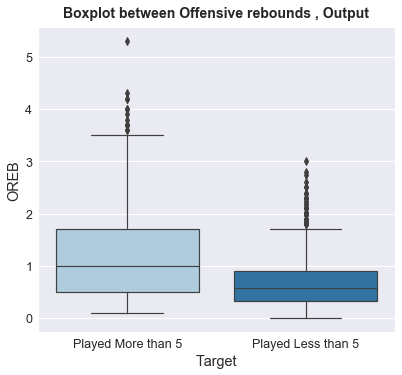

In [513]:
sns.boxplot(x='Target',y=column_names[12],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[12]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Offensive rebounds , Output')

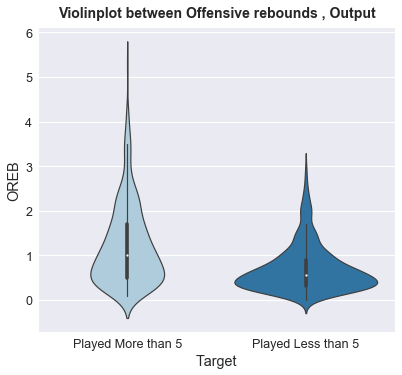

In [514]:
sns.violinplot(x='Target',y=column_names[12],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[12]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>

1. Players who had offensive rebound around 0.53-0.66 are more likely to play more than 5 
2. Players who had offensive rebound around 0.27-0.53 are more likely to play less than 5

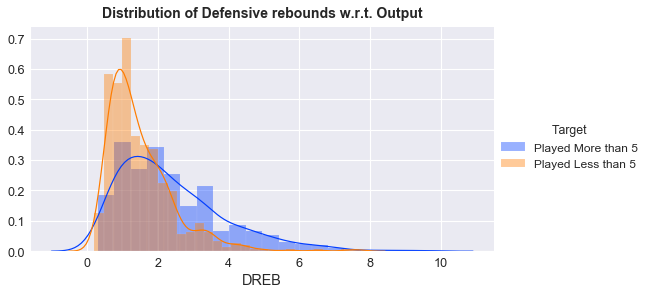

In [515]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[13])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[13]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Defensive rebounds , Output')

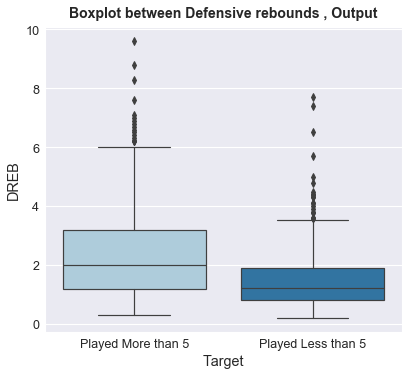

In [516]:
sns.boxplot(x='Target',y=column_names[13],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[13]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Defensive rebounds , Output')

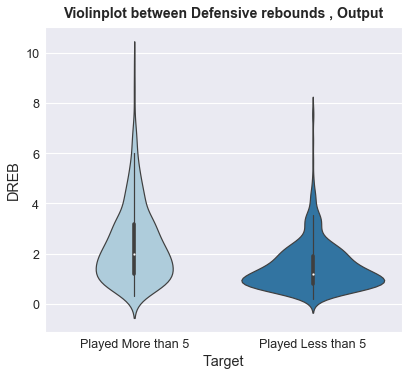

In [517]:
sns.violinplot(x='Target',y=column_names[13],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[13]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

In [518]:
px.violin(df1,x='Target',y='DREB',box=True)

<b>Observation</b>
1. Players who had defensive rebound around 1.16-1.74 are more likely to play more than 5
2. Players who had defensive rebound around 0.71-1.16 are more likely to play less than 5

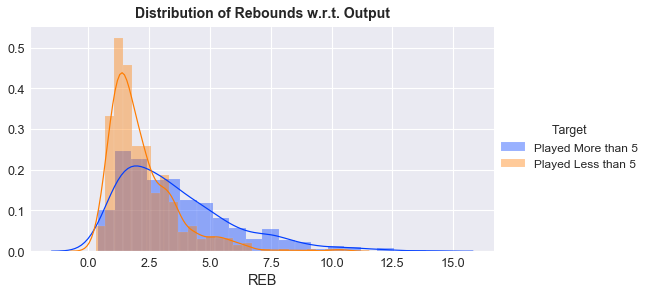

In [519]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[14])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[14]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Rebounds , Output')

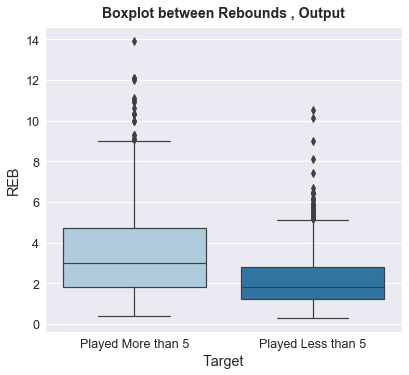

In [520]:
sns.boxplot(x='Target',y=column_names[14],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[14]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Rebounds , Output')

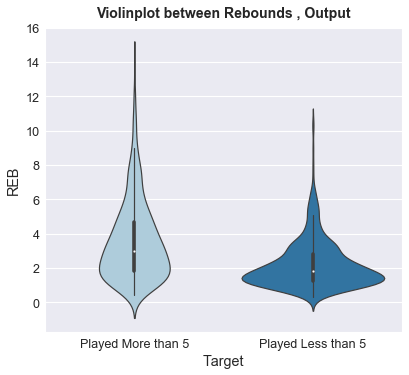

In [521]:
sns.violinplot(x='Target',y=column_names[14],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[14]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

<b>Observation</b>

1. Players who had around 1.69-2.27 Rebound are more likely to play more than 5
2. Players who had around 1.10-1.69 Rebound are more likely to play less than 5

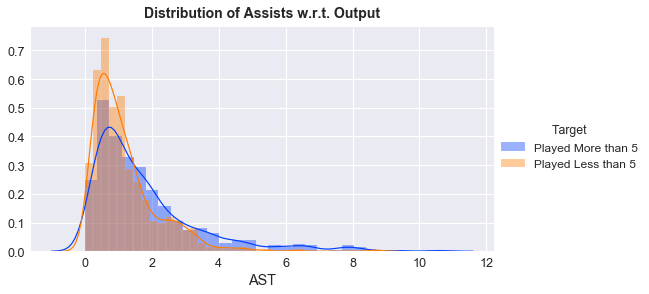

In [522]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[15])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[15]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Assists , Output')

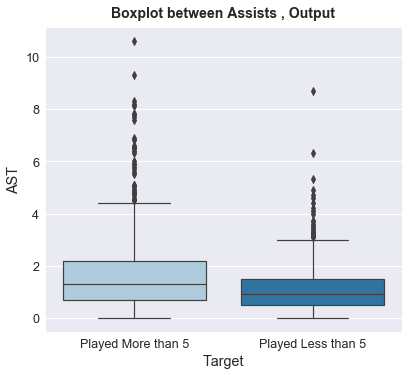

In [523]:
sns.boxplot(x='Target',y=column_names[15],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[15]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Assists , Output')

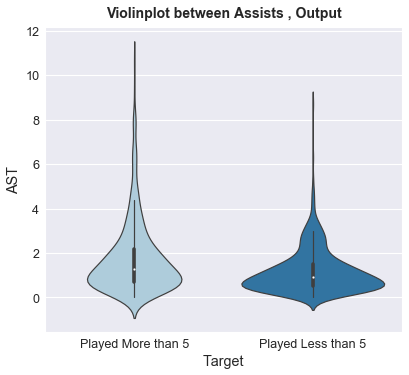

In [524]:
sns.violinplot(x='Target',y=column_names[15],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[15]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

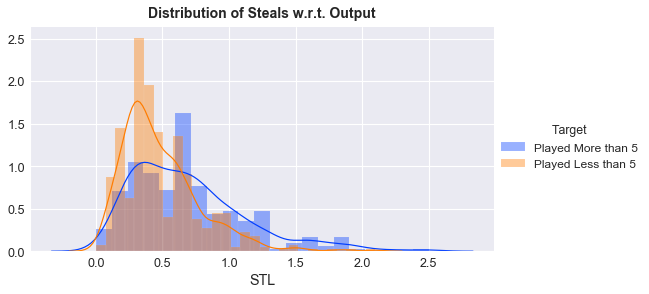

In [525]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[16])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[16]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Steals , Output')

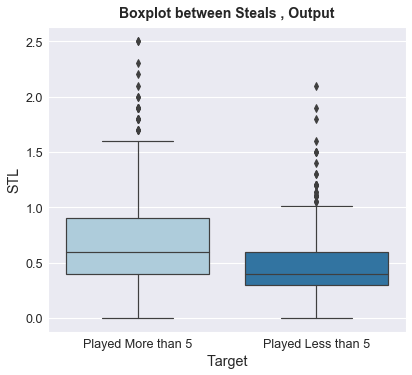

In [526]:
sns.boxplot(x='Target',y=column_names[16],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[16]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Steals , Output')

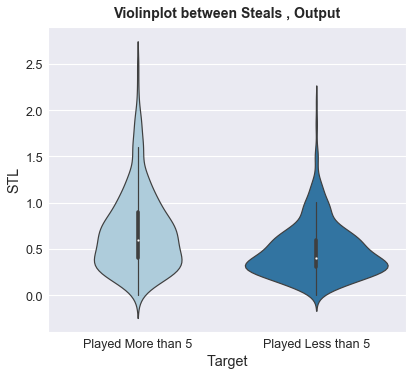

In [527]:
sns.violinplot(x='Target',y=column_names[16],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[16]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

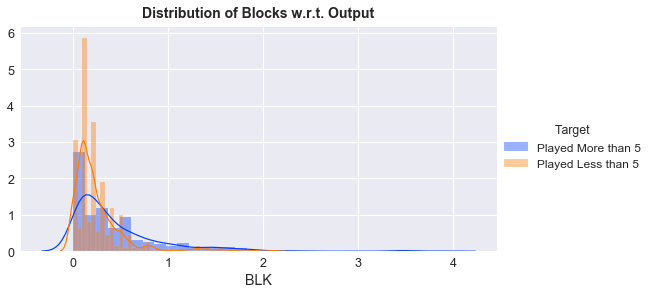

In [528]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[17])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[17]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Blocks , Output')

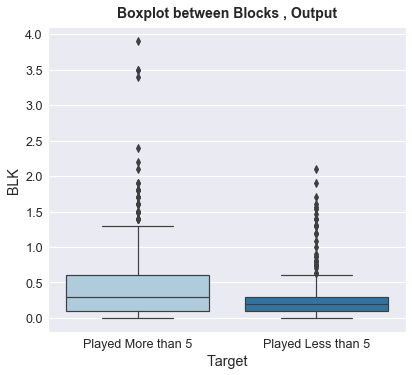

In [529]:
sns.boxplot(x='Target',y=column_names[17],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[17]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Blocks , Output')

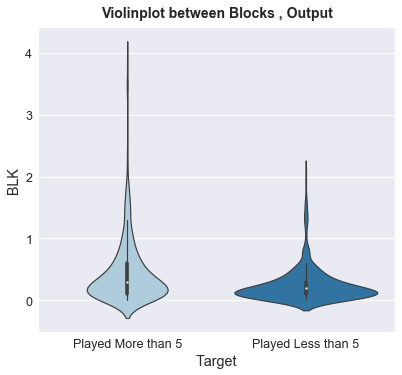

In [530]:
sns.violinplot(x='Target',y=column_names[17],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[17]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

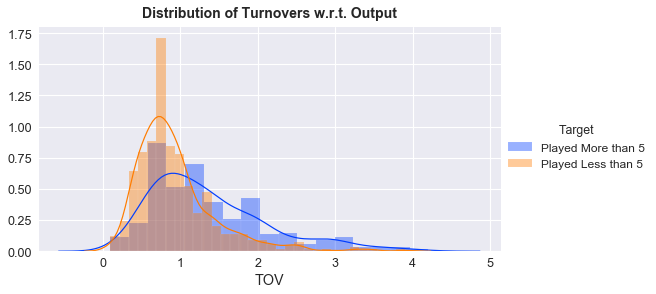

In [531]:
a=sns.FacetGrid(df1,palette='bright',hue='Target',aspect=9/5,height=4)
a.map(sns.distplot,column_names[18])
plt.title('Distribution of %s w.r.t. Output' % names[column_names[18]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Boxplot between Turnovers , Output')

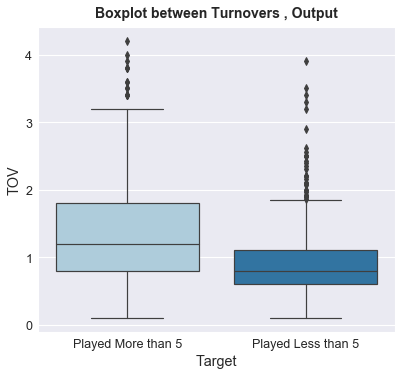

In [532]:
sns.boxplot(x='Target',y=column_names[18],data=df1)
plt.title('Boxplot between %s , Output' % names[column_names[18]],y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Turnovers , Output')

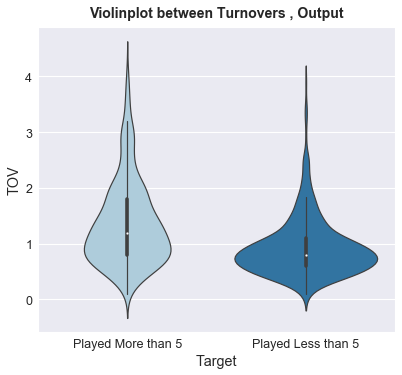

In [533]:
sns.violinplot(x='Target',y=column_names[18],data=df1)
plt.title('Violinplot between %s , Output' % names[column_names[18]] ,y=1.0, pad=10,fontsize=14,fontweight='bold')

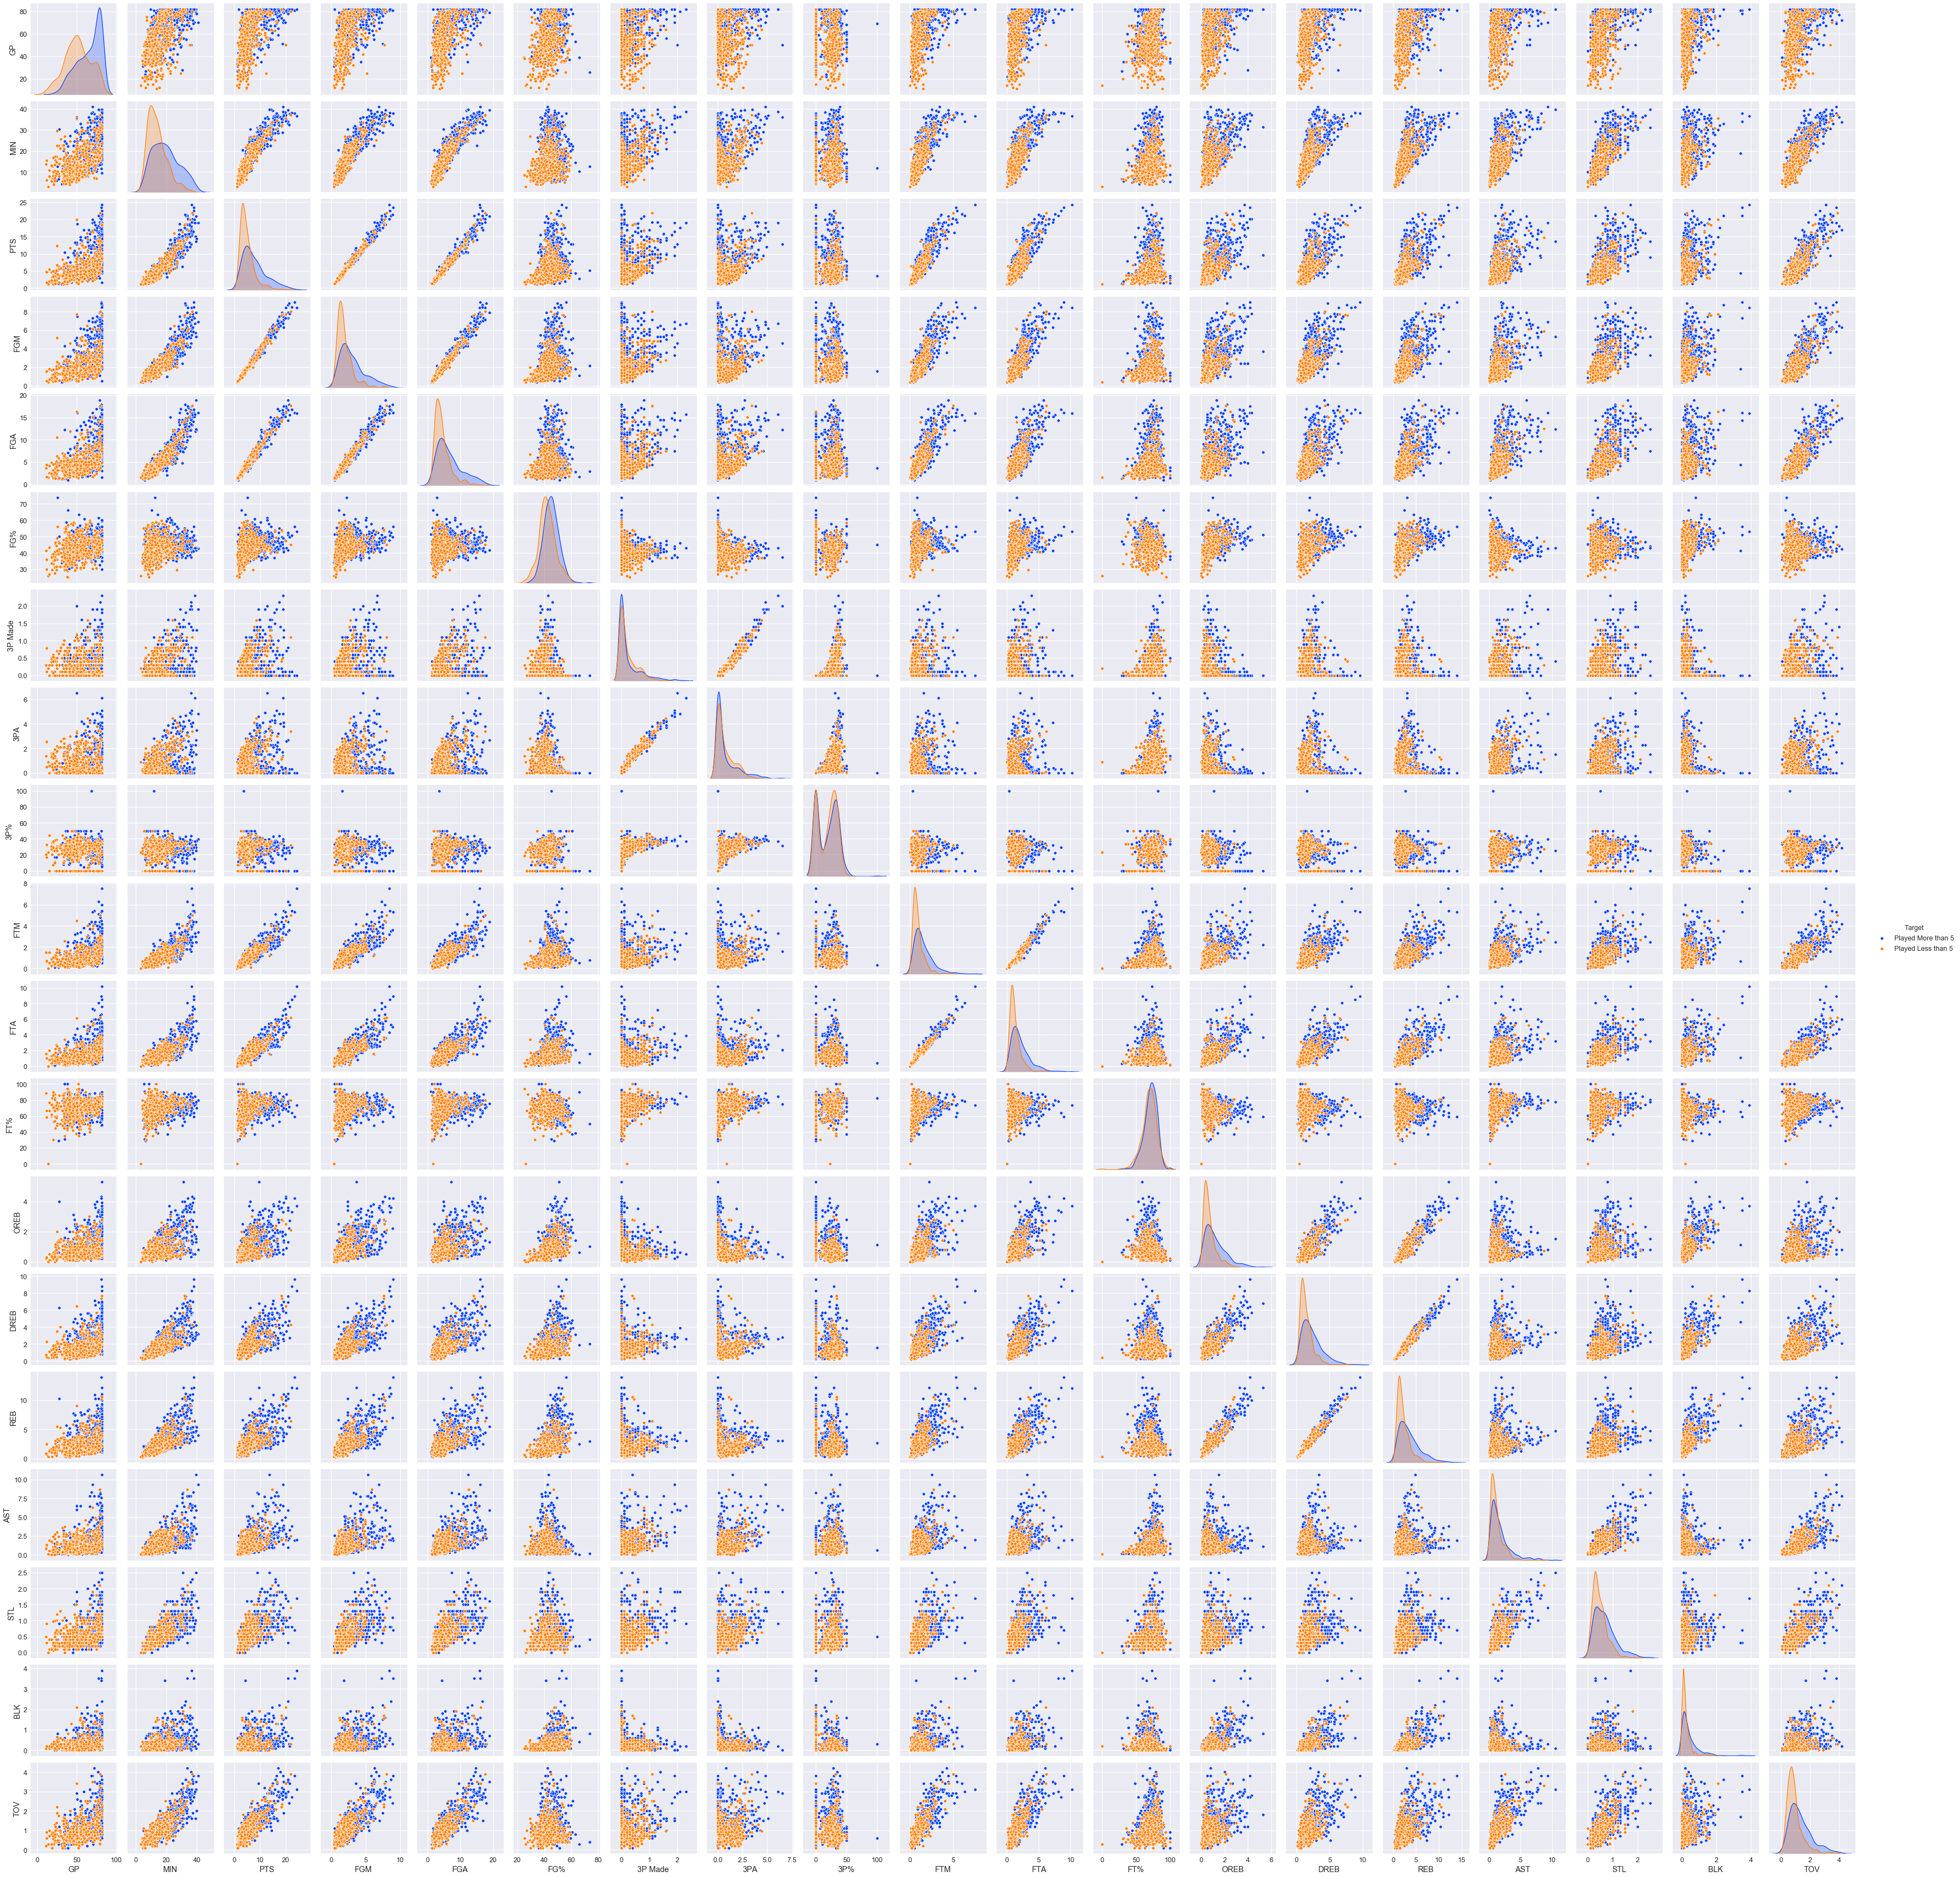

In [534]:
sns.pairplot(df1,hue='Target',palette='bright')

In [535]:
df.corr()

GP       MIN       PTS       FGM       FGA       FG%   3P Made  \
GP       1.000000  0.596357  0.558244  0.561145  0.537137  0.310895  0.119595   
MIN      0.596357  1.000000  0.918264  0.905489  0.914114  0.211973  0.390542   
PTS      0.558244  0.918264  1.000000  0.991033  0.980013  0.272255  0.337452   
FGM      0.561145  0.905489  0.991033  1.000000  0.979742  0.308350  0.277842   
FGA      0.537137  0.914114  0.980013  0.979742  1.000000  0.145322  0.382426   
FG%      0.310895  0.211973  0.272255  0.308350  0.145322  1.000000 -0.304532   
3P Made  0.119595  0.390542  0.337452  0.277842  0.382426 -0.304532  1.000000   
3PA      0.106704  0.398589  0.341765  0.282244  0.399330 -0.360298  0.982678   
3P%      0.026493  0.169725  0.147124  0.114917  0.202011 -0.376032  0.619991   
FTM      0.502075  0.811353  0.899845  0.853349  0.832288  0.267298  0.157143   
FTA      0.490604  0.795711  0.882502  0.843725  0.807849  0.320679  0.090530   
FT%      0.200039  0.241640  0.246680  0.214689  0.262776 -0.142038  0.310734   
OREB     0.416003  0.586255  0.590605  0.610619  0.514503  0.527119 -0.221181   
DREB     0.478836  0.756072  0.716958  0.723419  0.655417  0.431919  0.017703   
REB      0.472796  0.719870  0.696668  0.708522  0.627248  0.484302 -0.072795   
AST      0.361935  0.625946  0.546482  0.521606  0.587837 -0.130397  0.415002   
STL      0.455121  0.766311  0.669969  0.650974  0.689307  0.040709  0.353963   
BLK      0.302524  0.432429  0.433771  0.442781  0.360720  0.414445 -0.157557   
TOV      0.522605  0.830394  0.853030  0.834749  0.848879  0.125793  0.269701   
Target   0.410299  0.354152  0.354192  0.356119  0.327988  0.252236  0.037159   

              3PA       3P%       FTM       FTA       FT%      OREB      DREB  \
GP       0.106704  0.026493  0.502075  0.490604  0.200039  0.416003  0.478836   
MIN      0.398589  0.169725  0.811353  0.795711  0.241640  0.586255  0.756072   
PTS      0.341765  0.147124  0.899845  0.882502  0.246680  0.590605  0.716958   
FGM      0.282244  0.114917  0.853349  0.843725  0.214689  0.610619  0.723419   
FGA      0.399330  0.202011  0.832288  0.807849  0.262776  0.514503  0.655417   
FG%     -0.360298 -0.376032  0.267298  0.320679 -0.142038  0.527119  0.431919   
3P Made  0.982678  0.619991  0.157143  0.090530  0.310734 -0.221181  0.017703   
3PA      1.000000  0.612823  0.165934  0.096702  0.321690 -0.237302  0.007024   
3P%      0.612823  1.000000  0.018112 -0.048118  0.329070 -0.294037 -0.132653   
FTM      0.165934  0.018112  1.000000  0.980388  0.236930  0.604364  0.686171   
FTA      0.096702 -0.048118  0.980388  1.000000  0.092367  0.673121  0.731581   
FT%      0.321690  0.329070  0.236930  0.092367  1.000000 -0.143924 -0.016600   
OREB    -0.237302 -0.294037  0.604364  0.673121 -0.143924  1.000000  0.847967   
DREB     0.007024 -0.132653  0.686171  0.731581 -0.016600  0.847967  1.000000   
REB     -0.086081 -0.198723  0.681736  0.737864 -0.065965  0.937130  0.979235   
AST      0.444800  0.296920  0.473577  0.419419  0.308191 -0.016893  0.193664   
STL      0.379792  0.233972  0.597443  0.568765  0.228524  0.275706  0.414556   
BLK     -0.172752 -0.264620  0.462012  0.521547 -0.150065  0.665600  0.712691   
TOV      0.290051  0.111586  0.811781  0.800064  0.197130  0.434725  0.591945   
Target   0.018759  0.001285  0.333098  0.334718  0.088597  0.329306  0.323428   

              REB       AST       STL       BLK       TOV    Target  
GP       0.472796  0.361935  0.455121  0.302524  0.522605  0.410299  
MIN      0.719870  0.625946  0.766311  0.432429  0.830394  0.354152  
PTS      0.696668  0.546482  0.669969  0.433771  0.853030  0.354192  
FGM      0.708522  0.521606  0.650974  0.442781  0.834749  0.356119  
FGA      0.627248  0.587837  0.689307  0.360720  0.848879  0.327988  
FG%      0.484302 -0.130397  0.040709  0.414445  0.125793  0.252236  
3P Made -0.072795  0.415002  0.353963 -0.157557  0.269701  0.037159  
3PA     -0.086081  0.444800  0.379792 -0.172752  0.

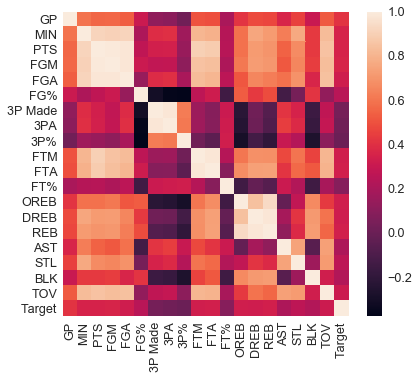

In [536]:
sns.heatmap(df.corr())

In [537]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

Text(0.5, 1.0, 'Boxplot of Games Played before removal of outliers')

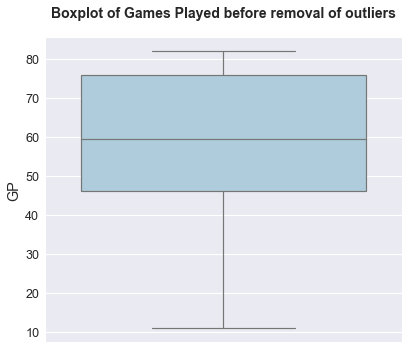

In [538]:
sns.boxplot(y=column_names[0],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[0]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Minutes Played before removal of outliers')

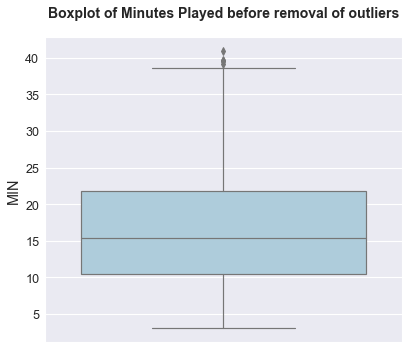

In [539]:
sns.boxplot(y=column_names[1],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[1]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Minutes Played after removal of outliers')

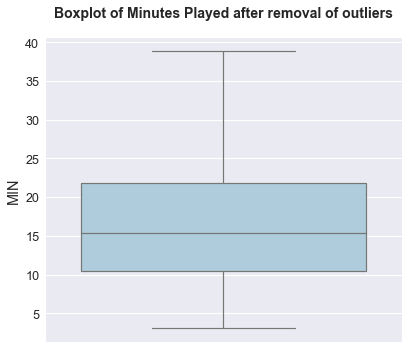

In [540]:
lower,upper=remove_outliers(df[column_names[1]])
df[column_names[1]]=np.where(df[column_names[1]]>upper,upper,df[column_names[1]])
df[column_names[1]]=np.where(df[column_names[1]]<lower,lower,df[column_names[1]])
sns.boxplot(y=column_names[1],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[1]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Number of points per game before removal of outliers')

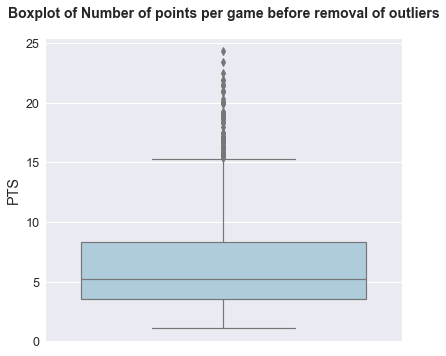

In [541]:
sns.boxplot(y=column_names[2],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[2]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Number of points per game after removal of outliers')

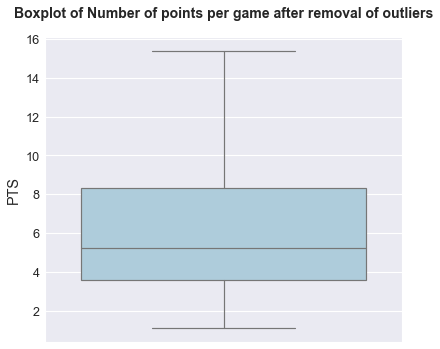

In [542]:
lower,upper=remove_outliers(df[column_names[2]])
df[column_names[2]]=np.where(df[column_names[2]]>upper,upper,df[column_names[2]])
df[column_names[2]]=np.where(df[column_names[2]]<lower,lower,df[column_names[2]])
sns.boxplot(y=column_names[2],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[2]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Field goals made before removal of outliers')

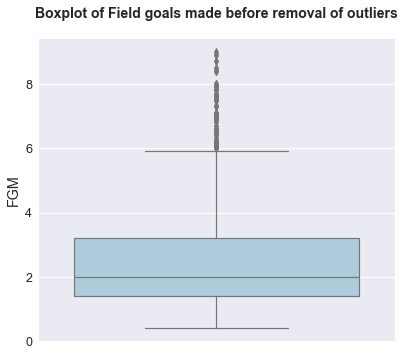

In [543]:
sns.boxplot(y=column_names[3],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[3]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Field goals made after removal of outliers')

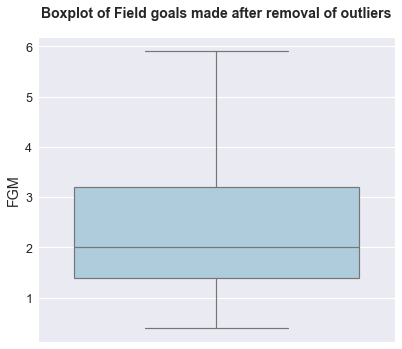

In [544]:
lower,upper=remove_outliers(df[column_names[3]])
df[column_names[3]]=np.where(df[column_names[3]]>upper,upper,df[column_names[3]])
df[column_names[3]]=np.where(df[column_names[3]]<lower,lower,df[column_names[3]])
sns.boxplot(y=column_names[3],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[3]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Field goals attempt before removal of outliers')

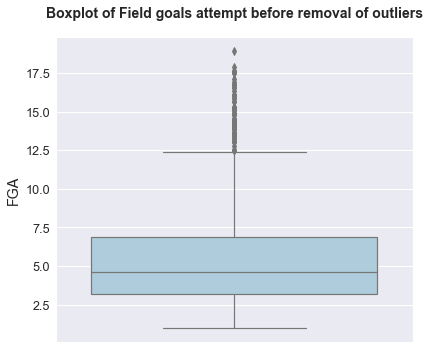

In [545]:
i=4
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Field goals attempt after removal of outliers')

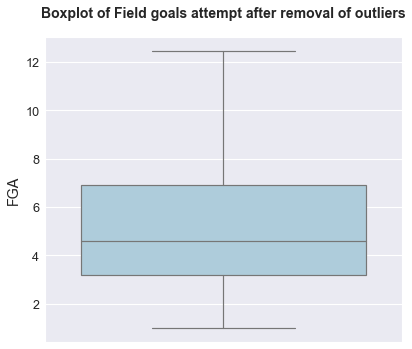

In [546]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of field goals percent before removal of outliers')

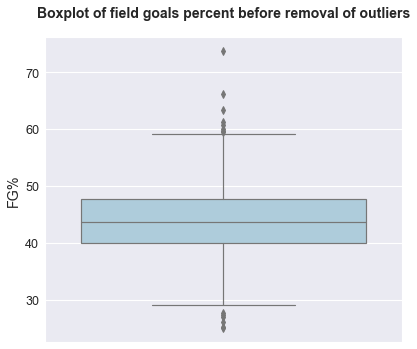

In [547]:
i=5
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of field goals percent after removal of outliers')

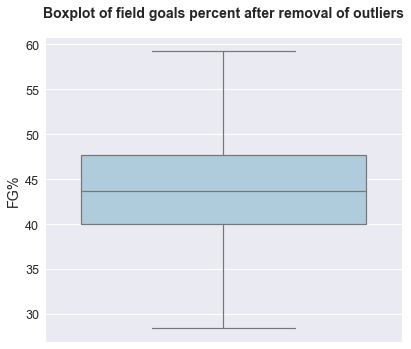

In [548]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of 3 point made before removal of outliers')

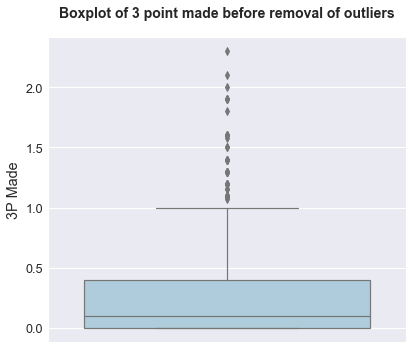

In [549]:
i=6
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of 3 point made after removal of outliers')

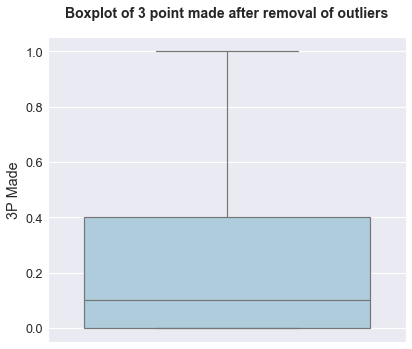

In [550]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of 3 points attempt before removal of outliers')

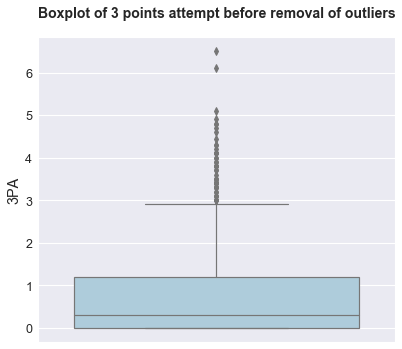

In [551]:
i=7
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of 3 points attempt after removal of outliers')

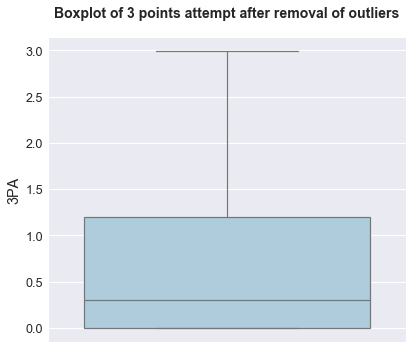

In [552]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of 3 point percent before removal of outliers')

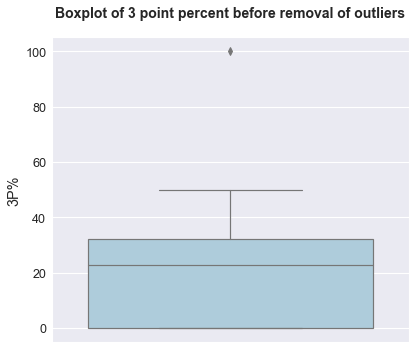

In [553]:
i=8
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of 3 point percent after removal of outliers')

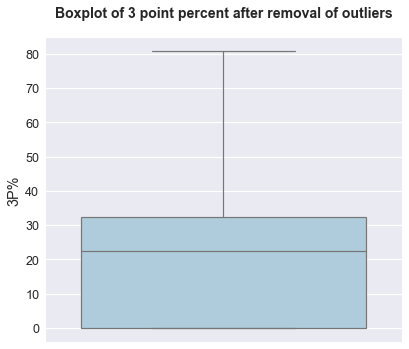

In [554]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Free throw made before removal of outliers')

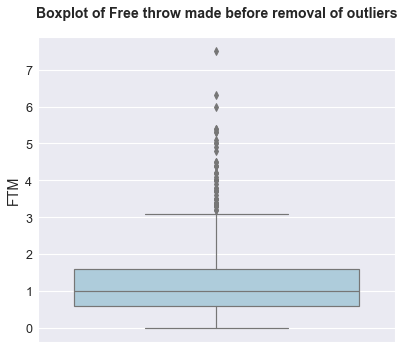

In [555]:
i=9
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Free throw made after removal of outliers')

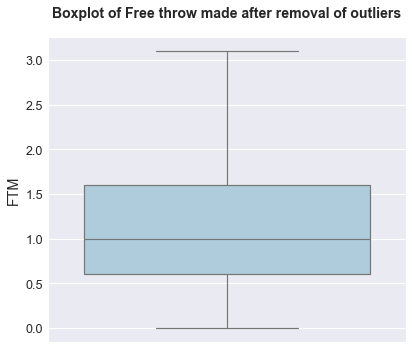

In [556]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Free throw attempts before removal of outliers')

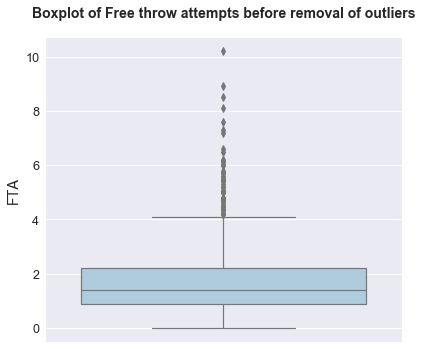

In [557]:
i=10
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Free throw attempts after removal of outliers')

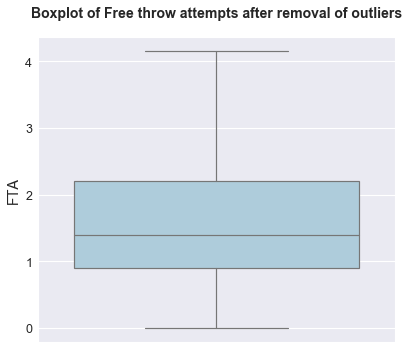

In [558]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Free throw percent before removal of outliers')

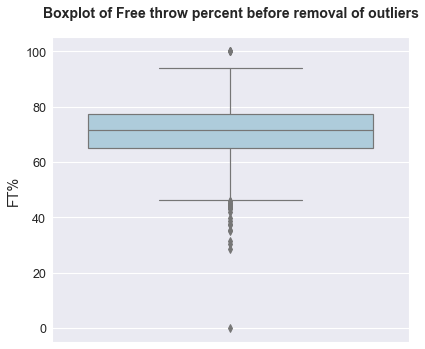

In [559]:
i=11
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Free throw percent after removal of outliers')

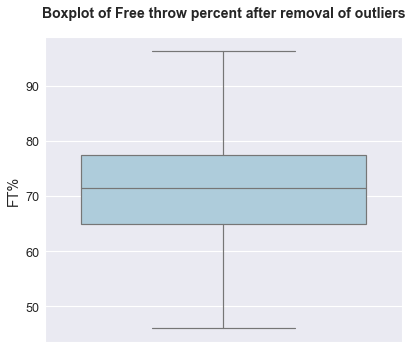

In [560]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Offensive rebounds before removal of outliers')

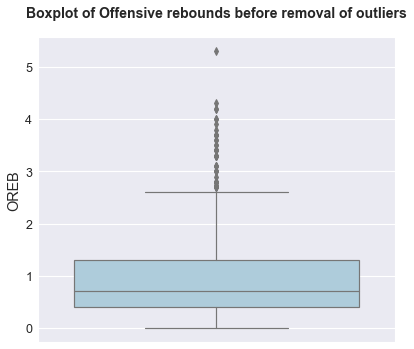

In [561]:
i=12
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Offensive rebounds after removal of outliers')

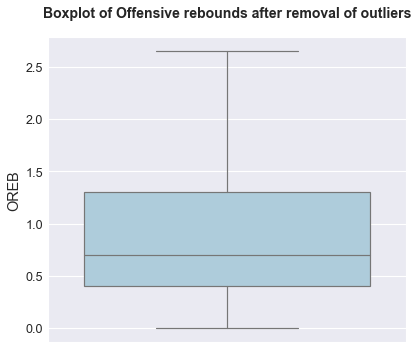

In [562]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Defensive rebounds before removal of outliers')

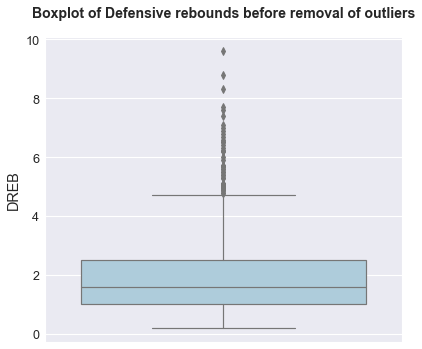

In [563]:
i=13
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Defensive rebounds after removal of outliers')

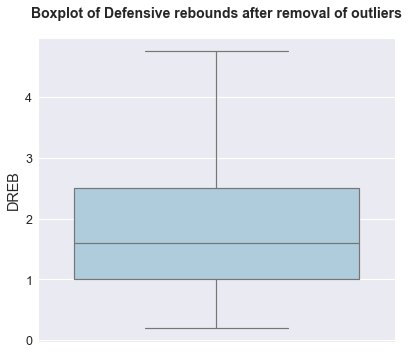

In [564]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Rebounds before removal of outliers')

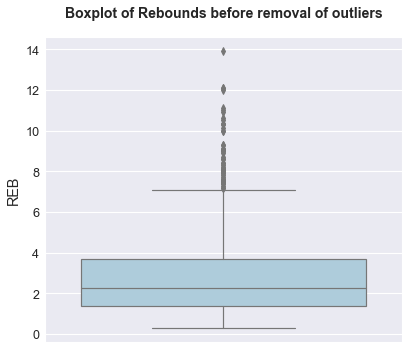

In [565]:
i=14
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Rebounds after removal of outliers')

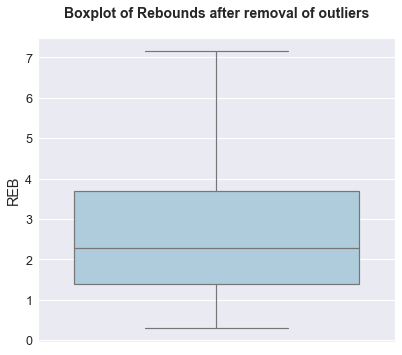

In [566]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Assists before removal of outliers')

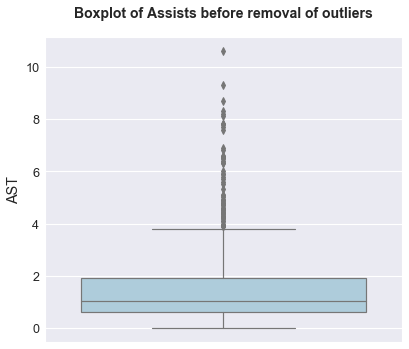

In [567]:
i=15
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Assists after removal of outliers')

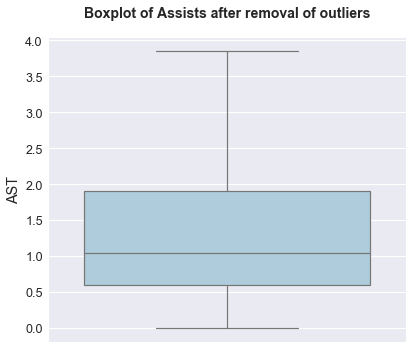

In [568]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Steals before removal of outliers')

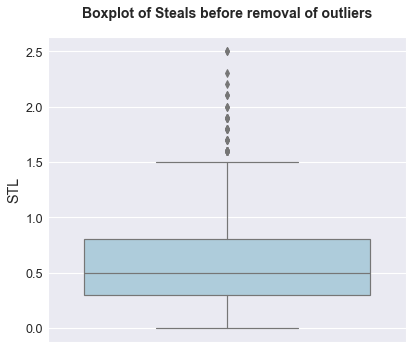

In [569]:
i=16
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Steals after removal of outliers')

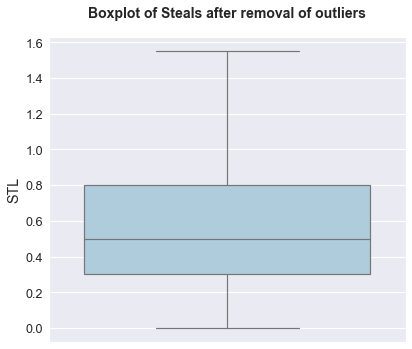

In [570]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Blocks before removal of outliers')

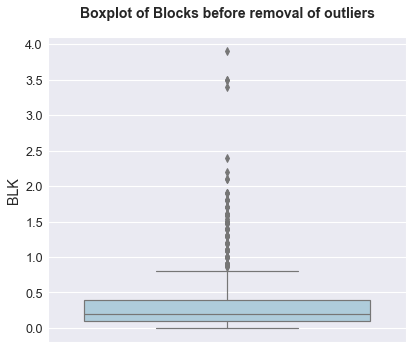

In [571]:
i=17
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Blocks after removal of outliers')

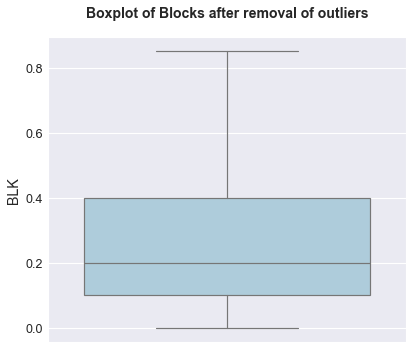

In [572]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Turnovers before removal of outliers')

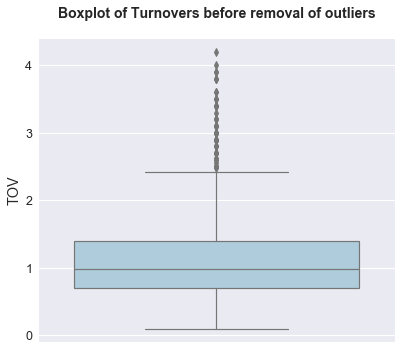

In [573]:
i=18
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Turnovers after removal of outliers')

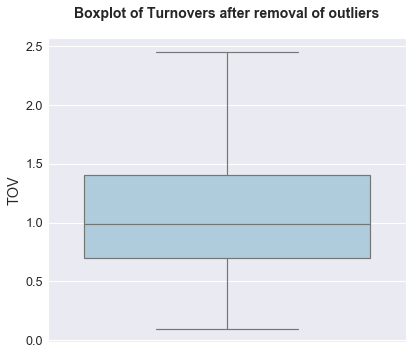

In [574]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

In [575]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [576]:
from sklearn.model_selection import train_test_split
X=df.drop('Target',axis=1)
y=df['Target']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

def class_model(model):
    clf = model
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    return clf, score
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    clf, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

scale=[]
scaler=[]
scaler.append('No scale')
scale.append(model_performance['Score'].mean())

[02:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [577]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_train_norm=pd.DataFrame(X_train_norm, columns = df.drop('Target',axis=1).columns)
X_test_norm = norm.transform(X_test)
X_test_norm=pd.DataFrame(X_test_norm, columns = df.drop('Target',axis=1).columns)

def class_model(model):
    clf = model
    clf.fit(X_train_norm, y_train)
    score = clf.score(X_test_norm, y_test)
    return clf, score
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    clf, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

scaler.append('Min Max')
scale.append(model_performance['Score'].mean())


[02:36:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [578]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_train_std=pd.DataFrame(X_train_std, columns = df.drop('Target',axis=1).columns)
X_test_std = std.transform(X_test)
X_test_std=pd.DataFrame(X_test_std, columns = df.drop('Target',axis=1).columns)
def class_model(model):
    clf = model
    clf.fit(X_train_std, y_train)
    score = clf.score(X_test_std, y_test)
    return clf, score
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    clf, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

scaler.append('Standard')
scale.append(model_performance['Score'].mean())

[02:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [579]:
from sklearn.preprocessing import MaxAbsScaler
abs_ = MaxAbsScaler()
X_train_abs = abs_.fit_transform(X_train)
X_train_abs=pd.DataFrame(X_train_abs, columns = df.drop('Target',axis=1).columns)
X_test_abs = abs_.transform(X_test)
X_test_abs=pd.DataFrame(X_test_abs, columns = df.drop('Target',axis=1).columns)
def class_model(model):
    clf = model
    clf.fit(X_train_abs, y_train)
    score = clf.score(X_test_abs, y_test)
    return clf, score
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    clf, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

scaler.append('Max Abs')
scale.append(model_performance['Score'].mean())

[02:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [580]:
from sklearn.preprocessing import RobustScaler
rob = RobustScaler()
X_train_rob = rob.fit_transform(X_train)
X_train_rob=pd.DataFrame(X_train_rob, columns = df.drop('Target',axis=1).columns)
X_test_rob = rob.transform(X_test)
X_test_rob=pd.DataFrame(X_test_rob, columns = df.drop('Target',axis=1).columns)
def class_model(model):
    clf = model
    clf.fit(X_train_rob, y_train)
    score = clf.score(X_test_rob, y_test)
    return clf, score
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    clf, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

scaler.append('Robust')
scale.append(model_performance['Score'].mean())

[02:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [581]:
from sklearn.preprocessing import QuantileTransformer
qua = QuantileTransformer()
X_train_qua = qua.fit_transform(X_train)
X_train_qua=pd.DataFrame(X_train_qua, columns = df.drop('Target',axis=1).columns)
X_test_qua = qua.transform(X_test)
X_test_qua=pd.DataFrame(X_test_qua, columns = df.drop('Target',axis=1).columns)

def class_model(model):
    clf = model
    clf.fit(X_train_qua, y_train)
    score = clf.score(X_test_qua, y_test)
    return clf, score
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    clf, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

scaler.append('Quantile Tranformer')
scale.append(model_performance['Score'].mean())

[02:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [582]:
from sklearn.preprocessing import Normalizer
norm_l2 = Normalizer(norm = 'l2')
X_train_norm_l2 = norm_l2.fit_transform(X_train)
X_train_norm_l2=pd.DataFrame(X_train_norm_l2, columns = df.drop('Target',axis=1).columns)
X_test_norm_l2 = norm_l2.transform(X_test)
X_test_norm_l2=pd.DataFrame(X_test_norm_l2, columns = df.drop('Target',axis=1).columns)

def class_model(model):
    clf = model
    clf.fit(X_train_norm_l2, y_train)
    score = clf.score(X_test_norm_l2, y_test)
    return clf, score
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    clf, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

scaler.append('Normalizer L2 Norm')
scale.append(model_performance['Score'].mean())

[02:36:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [583]:
from sklearn.preprocessing import Normalizer
norm_l1 = Normalizer(norm = 'l1')
X_train_norm_l1 = norm_l1.fit_transform(X_train)
X_train_norm_l1=pd.DataFrame(X_train_norm_l1, columns = df.drop('Target',axis=1).columns)
X_test_norm_l1 = norm_l1.transform(X_test)
X_test_norm_l1=pd.DataFrame(X_test_norm_l1, columns = df.drop('Target',axis=1).columns)


def class_model(model):
    clf = model
    clf.fit(X_train_norm_l1, y_train)
    score = clf.score(X_test_norm_l1, y_test)
    return clf, score
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    clf, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

scaler.append('Normalizer L1 Norm')
scale.append(model_performance['Score'].mean())

[02:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [584]:
scale_performance = pd.DataFrame(columns = ["Scale", "Score"])
scale_performance['Scale']=scaler
scale_performance['Score']=scale
scale_performance

Scale     Score
0             No scale  0.708145
1              Min Max  0.695701
2             Standard  0.697398
3              Max Abs  0.694570
4               Robust  0.691176
5  Quantile Tranformer  0.706448
6   Normalizer L2 Norm  0.680995
7   Normalizer L1 Norm  0.690611

Quantile Transformer has the best score 

Feature Seclection

In [681]:
X=X_train_std
y=y_train
X_train_fea,X_test_fea,y_train_fea,y_test_fea=train_test_split(X, y, test_size = 0.2, random_state = 42)


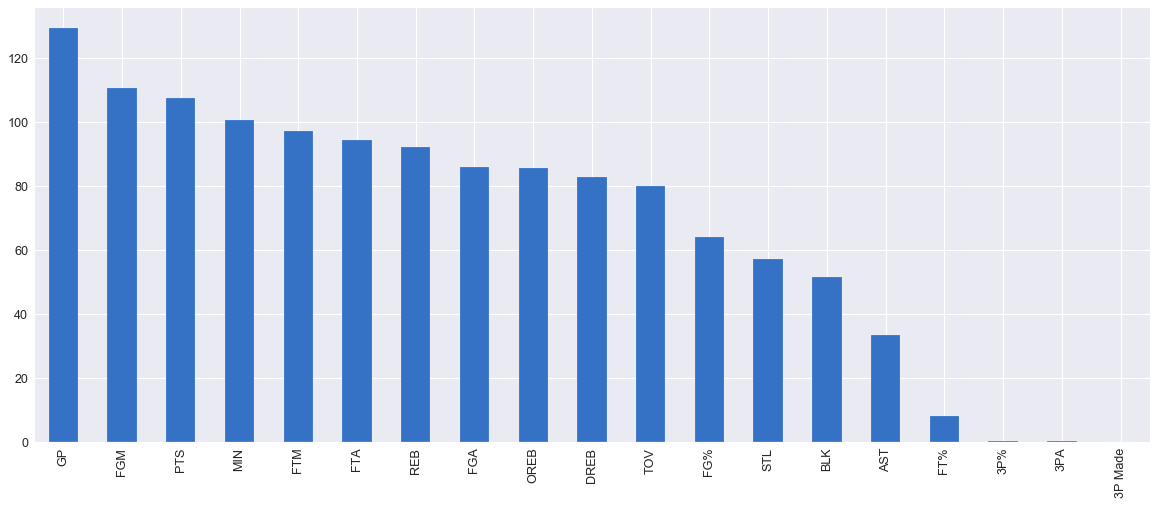

In [682]:
from sklearn.feature_selection import f_classif
f_score = f_classif(X_train_fea, y_train_fea)
f_stat=pd.Series(f_score[0])
f_stat.index=X_train_fea.columns
f_stat.sort_values(ascending=False)
f_stat.sort_values(ascending=False).plot.bar(figsize=(20, 8),color='b')


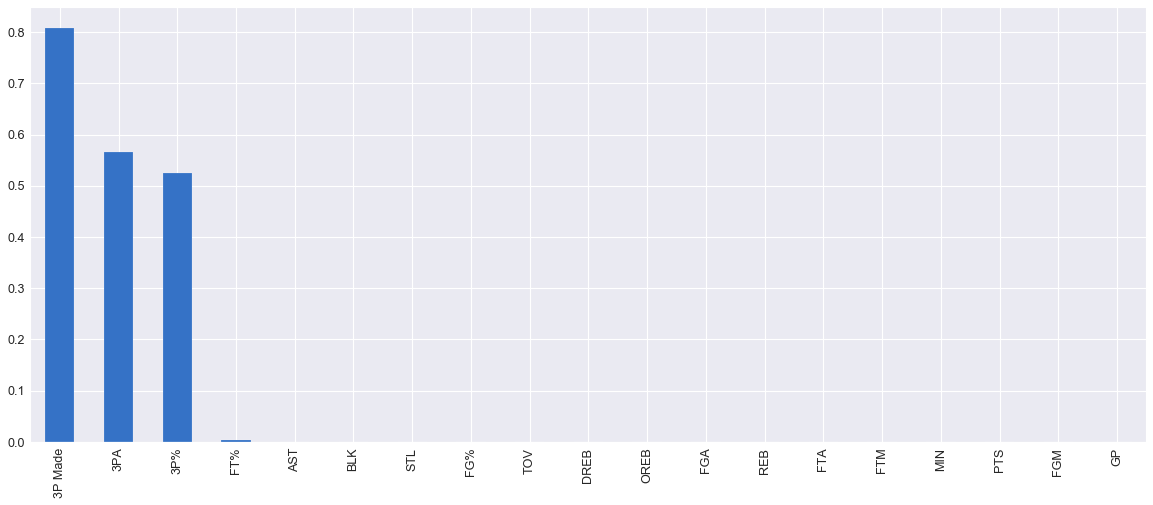

In [683]:
p_val=pd.Series(f_score[1])
p_val.index=X_train_fea.columns
p_val.sort_values(ascending=False)
p_val.sort_values(ascending=False
                 ).plot.bar(figsize=(20, 8),color='b')
import plotly.express as px

fig = px.bar(p_val, height=400)
fig.show()

10 Features

In [684]:
from sklearn.feature_selection import SelectKBest
column_names = df.drop(columns = ['Target']).columns
selector = SelectKBest(score_func=f_classif, k = 16)
X_train_transformed_filter = selector.fit_transform(X_train_fea, y_train_fea)
X_test_transformed_filter = selector.transform(X_test_fea)
column_names[selector.get_support()]

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [589]:
column_names

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [685]:
def class_model(model):
    clf = model
    clf.fit(X_train_transformed_filter, y_train_fea)
    score = clf.score(X_test_transformed_filter, y_test_fea)
    return clf, score

In [686]:
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    regressor, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

model_performance

[14:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model     Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.687500
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.704545
2  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.687500
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.647727
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.727273
5  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...  0.710227
6  LGBMClassifier(boosting_type='gbdt', class_wei...  0.681818
7  XGBClassifier(base_score=0.5, booster='gbtree'...  0.693182

In [687]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = RandomForestClassifier(random_state=42,n_jobs=-1)

sfs1 = sfs(clf,
           k_features=(3,19),
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(X_train_fea, y_train_fea)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   29.3s finished

[2021-06-01 14:04:05] Features: 1/19 -- score: 0.7045390070921986[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   25.9s finished

[2021-06-01 14:04:31] Features: 2/19 -- score: 0.6789665653495441[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   23.6s finished

[2021-06-01 14:04:55] Features: 3/19 -- score: 0.7074062816616008[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [688]:
feat_cols = list(sfs1.k_feature_idx_)
feat_cols

[0, 1, 3, 4, 6, 8, 13, 14, 15, 17]

In [689]:
X_train_fea.columns[feat_cols]

Index(['GP', 'MIN', 'FGM', 'FGA', '3P Made', '3P%', 'DREB', 'REB', 'AST',
       'BLK'],
      dtype='object')

In [690]:
X_train_transformed_filter = X_train_fea[X_train_fea.columns[feat_cols]]
X_test_transformed_filter = X_test_fea[X_train_fea.columns[feat_cols]]
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    regressor, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

model_performance

[14:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model     Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.727273
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.670455
2  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.721591
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.676136
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.738636
5  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...  0.744318
6  LGBMClassifier(boosting_type='gbdt', class_wei...  0.704545
7  XGBClassifier(base_score=0.5, booster='gbtree'...  0.721591

In [691]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = RandomForestClassifier(random_state=42)

sbs = sfs(clf,
           k_features=(3,19),
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sbs = sbs.fit(X_train_fea, y_train_fea)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   18.5s finished

[2021-06-01 14:08:31] Features: 18/3 -- score: 0.7215906788247214[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   17.5s finished

[2021-06-01 14:08:49] Features: 17/3 -- score: 0.7173454913880446[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   17.0s finished

[2021-06-01 14:09:06] Features: 16/3 -- score: 0.713049645390071[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [692]:
feat_cols = list(sbs.k_feature_idx_)
X_train_fea.columns[feat_cols]

Index(['GP', '3PA', '3P%', 'FTM', 'FT%', 'OREB', 'BLK'], dtype='object')

In [693]:
X_train_transformed_filter = X_train_fea[X_train_fea.columns[feat_cols]]
X_test_transformed_filter = X_test_fea[X_train_fea.columns[feat_cols]]
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    regressor, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

model_performance

[14:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model     Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.727273
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.732955
2  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.727273
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.653409
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.761364
5  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...  0.715909
6  LGBMClassifier(boosting_type='gbdt', class_wei...  0.732955
7  XGBClassifier(base_score=0.5, booster='gbtree'...  0.727273

In [694]:
from sklearn.feature_selection import RFE

no_of_features = []
accuracy_test = []

for k in range(3, 20):
    clf = RandomForestClassifier(random_state=42)
    rfe=RFE(clf,k)
    X_train_transformed_filter = rfe.fit_transform(X_train_fea, y_train_fea)
    X_test_transformed_filter = rfe.transform(X_test_fea)
    clf.fit(X_train_transformed_filter, y_train_fea)
    no_of_features.append(k)
    accuracy_test.append(clf.score(X_test_transformed_filter, y_test_fea))
    


px.line(x=no_of_features,y=accuracy_test)

7 Features

In [695]:
column_names = df.drop(columns = ['Target']).columns
clf=RandomForestClassifier(random_state=42)
rfe=RFE(clf,5)
X_train_transformed_filter = rfe.fit_transform(X_train_fea, y_train_fea)
X_test_transformed_filter = rfe.transform(X_test_fea)
clf.fit(X_train_transformed_filter, y_train_fea)
column_names[rfe.get_support()]

Index(['GP', 'MIN', 'PTS', 'FGM', 'FG%'], dtype='object')

In [696]:
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    regressor, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

model_performance

[16:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model     Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.698864
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.704545
2  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.698864
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.636364
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.744318
5  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...  0.738636
6  LGBMClassifier(boosting_type='gbdt', class_wei...  0.732955
7  XGBClassifier(base_score=0.5, booster='gbtree'...  0.721591

In [697]:
lasso=LogisticRegression(C=1,penalty='l1',solver='liblinear',random_state=42)
lasso_coef=lasso.fit(X_train_fea,y_train_fea).coef_

px.line(
    x=column_names,
    y=lasso_coef[0])

In [698]:
drop_features=column_names[lasso_coef[0]==0]
X_train_transformed_filter=X_train_fea.drop(drop_features,axis=1)
X_test_transformed_filter=X_test_fea.drop(drop_features,axis=1)
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    regressor, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

model_performance

[16:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model     Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.687500
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.659091
2  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.693182
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.630682
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.744318
5  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...  0.704545
6  LGBMClassifier(boosting_type='gbdt', class_wei...  0.715909
7  XGBClassifier(base_score=0.5, booster='gbtree'...  0.727273

[02:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 0.93, 'Feature Importance')

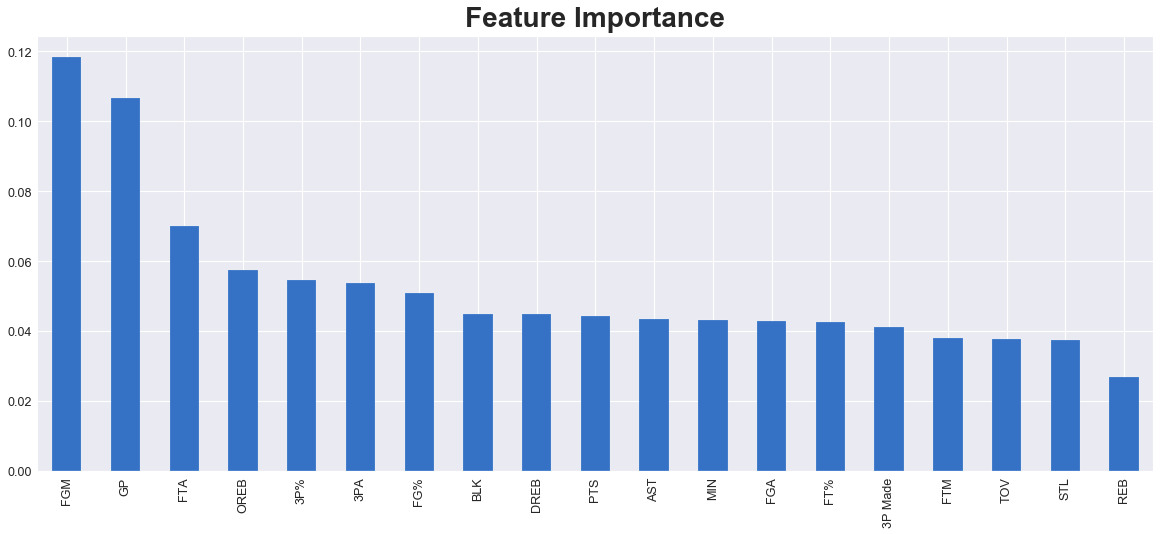

In [604]:
clf = XGBClassifier(random_state=42)
# fit the model
clf.fit(X_train_fea, y_train_fea)
feature_imp=pd.Series(clf.feature_importances_)
feature_imp.index=X_train_fea.columns
feature_imp.sort_values(ascending=False)
feature_imp.sort_values(ascending=False).plot.bar(figsize=(20, 8),color='b')
plt.title('Feature Importance',y=0.93, pad=40,fontsize=28,fontweight='bold')

In [605]:
column_names = df.drop(columns = ['Target']).columns
clf=LogisticRegression(random_state=42)
rfe=RFE(clf,7)
X_train_transformed_filter = rfe.fit_transform(X_train_fea, y_train_fea)
X_test_transformed_filter = rfe.transform(X_test_fea)
clf.fit(X_train_transformed_filter, y_train_fea)
column_names[rfe.get_support()]

Index(['GP', 'FG%', '3P Made', '3P%', 'FT%', 'OREB', 'AST'], dtype='object')

In [606]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = LogisticRegression(random_state=42,n_jobs=-1)

sbs = sfs(clf,
           k_features=(3,19),
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sbs = sbs.fit(X_train_fea, y_train_fea)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.0s finished

[2021-06-01 02:37:26] Features: 18/3 -- score: 0.6974569402228977[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.8s finished

[2021-06-01 02:37:26] Features: 17/3 -- score: 0.7003140830800405[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.7s finished

[2021-06-01 02:37:27] Features: 16/3 -- score: 0.7031509625126647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [655]:
feat_cols = list(sbs.k_feature_idx_)
X_train_transformed_filter = X_train_fea[X_train_fea.columns[feat_cols]]
X_test_transformed_filter = X_test_fea[X_train_fea.columns[feat_cols]]
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    regressor, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

model_performance

[13:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model     Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.721591
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.659091
2  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.715909
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.585227
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.755682
5  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...  0.727273
6  LGBMClassifier(boosting_type='gbdt', class_wei...  0.715909
7  XGBClassifier(base_score=0.5, booster='gbtree'...  0.687500

In [656]:
X_tr=X_train_qua[X_train_qua.columns[feat_cols]]
y_tr=y_train
X_te=X_test_qua[X_train_qua.columns[feat_cols]]
y_te=y_test

In [657]:
from sklearn.metrics import classification_report
clf=RandomForestClassifier(random_state=42)
clf.fit(X_tr, y_tr)
y_pred=clf.predict(X_te)
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       109
           1       0.73      0.71      0.72       112

    accuracy                           0.72       221
   macro avg       0.72      0.72      0.72       221
weighted avg       0.72      0.72      0.72       221



In [432]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_tr, y_tr)


print("Tuned Parameter: {}".format(rf_random.best_params_))
print("Tuned Accuracy: {}".format(rf_random.best_score_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


Tuned Parameter: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Tuned Accuracy: 0.7374722357657512


In [433]:
clf=RandomForestClassifier(n_estimators=1000,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=10,bootstrap=True,random_state=42)
clf.fit(X_tr, y_tr)
y_pred=clf.predict(X_te)
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       109
           1       0.77      0.76      0.76       112

    accuracy                           0.76       221
   macro avg       0.76      0.76      0.76       221
weighted avg       0.76      0.76      0.76       221



In [440]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [900,1000,1100]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(2, 10, num = 9)]

min_samples_split = [10,12,15]

min_samples_leaf = [2,3]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_tr, y_tr)


print("Tuned Parameter: {}".format(rf_random.best_params_))
print("Tuned Accuracy: {}".format(rf_random.best_score_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


Tuned Parameter: {'n_estimators': 1000, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Tuned Accuracy: 0.7386060226138236


In [447]:
clf=RandomForestClassifier(n_estimators=1000,min_samples_split=12,min_samples_leaf=2,max_features='auto',max_depth=10,bootstrap=True,random_state=42)
clf.fit(X_tr, y_tr)
y_pred=clf.predict(X_te)
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       109
           1       0.76      0.76      0.76       112

    accuracy                           0.76       221
   macro avg       0.76      0.76      0.76       221
weighted avg       0.76      0.76      0.76       221



In [448]:
from sklearn.model_selection import RandomizedSearchCV

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 20, num = 11)]

min_samples_split = [11,12,13]


bootstrap = [True, False]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}

rf = RandomForestClassifier(n_estimators=1000,min_samples_split=12,min_samples_leaf=2,max_features='auto',max_depth=10,bootstrap=True)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_tr, y_tr)


print("Tuned Parameter: {}".format(rf_random.best_params_))
print("Tuned Accuracy: {}".format(rf_random.best_score_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.8min finished


Tuned Parameter: {'min_samples_split': 11, 'max_features': 'auto', 'max_depth': 17, 'bootstrap': True}
Tuned Accuracy: 0.7397514182009551


In [449]:
clf=RandomForestClassifier(n_estimators=1000,min_samples_split=11,min_samples_leaf=2,max_features='auto',max_depth=17,bootstrap=True,random_state=42)
clf.fit(X_tr, y_tr)
y_pred=clf.predict(X_te)
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       109
           1       0.76      0.76      0.76       112

    accuracy                           0.76       221
   macro avg       0.76      0.76      0.76       221
weighted avg       0.76      0.76      0.76       221



In [454]:
test_data=pd.read_csv('Test_data.csv')
test_data.head()

GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  44.0  13.0  6.6  2.5  5.6  45.3      0.4  1.3  32.7  1.1  1.7  65.3   0.8   
1  51.0   9.1  2.7  1.0  2.7  39.0      0.1  0.3  23.5  0.6  0.8  69.8   0.3   
2  51.0  15.1  5.7  2.2  5.2  41.2      0.3  0.8  32.5  1.1  1.6  69.1   0.4   
3  15.0   7.9  1.9  0.7  2.5  27.0      0.0  0.0   0.0  0.5  0.8  66.7   0.5   
4  36.0  14.4  5.8  2.3  5.4  43.1      0.0  0.1  50.0  1.1  1.4  82.0   1.1   

   DREB  REB  AST  STL  BLK  TOV  
0   0.6  1.4  1.1  0.7  0.2  1.0  
1   0.7  1.0  0.9  0.6  0.1  0.7  
2   1.3  1.7  2.1  0.7  0.0  1.4  
3   1.1  1.5  0.5  0.1  0.1  1.0  
4   1.4  2.4  0.9  0.3  0.2  0.9

In [460]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       555 non-null    float64
 1   MIN      555 non-null    float64
 2   PTS      555 non-null    float64
 3   FGM      555 non-null    float64
 4   FGA      555 non-null    float64
 5   FG%      555 non-null    float64
 6   3P Made  555 non-null    float64
 7   3PA      555 non-null    float64
 8   3P%      555 non-null    float64
 9   FTM      555 non-null    float64
 10  FTA      555 non-null    float64
 11  FT%      555 non-null    float64
 12  OREB     555 non-null    float64
 13  DREB     555 non-null    float64
 14  REB      555 non-null    float64
 15  AST      555 non-null    float64
 16  STL      555 non-null    float64
 17  BLK      555 non-null    float64
 18  TOV      555 non-null    float64
dtypes: float64(19)
memory usage: 82.5 KB


In [658]:
clf=RandomForestClassifier(n_estimators=1000,min_samples_split=11,min_samples_leaf=2,max_features='auto',max_depth=17,bootstrap=True,random_state=42)
clf.fit(X_tr, y_tr)
y_pred=clf.predict(X_te)
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       109
           1       0.72      0.72      0.72       112

    accuracy                           0.71       221
   macro avg       0.71      0.71      0.71       221
weighted avg       0.71      0.71      0.71       221



In [636]:
qua = QuantileTransformer()
test_data_qua = qua.fit_transform(test_data)
test_data_qua=pd.DataFrame(test_data_qua, columns = df.drop('Target',axis=1).columns)


In [632]:
feat_cols = list(sbs.k_feature_idx_)

In [634]:
list(sbs.k_feature_idx_)

[0, 1, 3, 5, 7, 8, 12, 15]

In [637]:
predict_set=test_data_qua[test_data.columns[feat_cols]]
y_pred1=clf.predict(predict_set)

In [638]:
len(y_pred1)

555

In [639]:
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,

In [640]:
res = pd.DataFrame(y_pred1) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("submission.csv", index = False) # the csv file will be saved locally on the same location where this notebook is located.